#

#Gas Sensor Array Drift Dataset Data Set 

https://archive.ics.uci.edu/ml/datasets/gas+sensor+array+drift+dataset

#Load Dataset on google colab  notebook

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00224/Dataset.zip

--2019-06-02 10:02:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00224/Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9989262 (9.5M) [application/x-httpd-php]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>]   9.53M  23.7MB/s    in 0.4s    

2019-06-02 10:02:41 (23.7 MB/s) - ‘Dataset.zip’ saved [9989262/9989262]



In [0]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/batch1.dat      
  inflating: Dataset/batch10.dat     
  inflating: Dataset/batch2.dat      
  inflating: Dataset/batch3.dat      
  inflating: Dataset/batch4.dat      
  inflating: Dataset/batch5.dat      
  inflating: Dataset/batch6.dat      
  inflating: Dataset/batch7.dat      
  inflating: Dataset/batch8.dat      
  inflating: Dataset/batch9.dat      


#Import required library

In [0]:
import pandas as pd

#Explore batch1.dat file

In [0]:
batch_1 = pd.read_csv('Dataset/batch1.dat' , delimiter=' ' , header = None)
print(batch_1.shape)
batch_1.head()

(445, 129)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,1:15596.162100,2:1.868245,3:2.371604,4:2.803678,5:7.512213,6:-2.739388,7:-3.344671,8:-4.847512,9:15326.691400,10:1.768526,11:2.269085,12:2.713374,13:6.915721,14:-2.488324,15:-3.082212,16:-5.056975,17:2789.383100,18:2.754759,19:0.430440,20:0.649457,21:1.795029,22:-0.426662,23:-0.584313,24:-1.438976,25:2581.568600,26:2.680623,27:0.399746,28:0.605065,29:1.786704,30:-0.400115,31:-0.550743,32:-1.728611,33:685.399400,34:1.682904,35:0.122736,36:0.223703,37:0.584691,38:-0.138196,39:-0.236907,...,89:2185.974100,90:2.949381,91:0.342575,92:0.515090,93:1.340477,94:-0.361030,95:-0.493482,96:-1.200617,97:862.747900,98:1.779291,99:0.165138,100:0.246473,101:1.358106,102:-0.187465,103:-0.416382,104:-1.058061,105:1059.756200,106:1.896047,107:0.198946,108:0.334017,109:0.815048,110:-0.204467,111:-0.345119,112:-0.969336,113:3357.112400,114:3.860647,115:0.580818,116:0.806830,117:1.729739,118:-0.619214,119:-1.071137,120:-3.037772,121:3037.039000,122:3.972203,123:0.527291,124:0.728443,125:1.445783,126:-0.545079,127:-0.902241,128:-2.654529
1,1,1:26402.070400,2:2.532401,3:5.411209,4:6.509906,5:7.658469,6:-4.722217,7:-5.817651,8:-7.518333,9:23855.781200,10:2.164706,11:4.901063,12:5.971392,13:6.978131,14:-4.199424,15:-5.221090,16:-7.604863,17:3882.905700,18:3.155054,19:0.802987,20:1.172245,21:1.570895,22:-0.697881,23:-0.944655,24:-1.334743,25:3651.042700,26:3.130669,27:0.739278,28:1.101765,29:1.428631,30:-0.659641,31:-0.915543,32:-1.334217,33:982.949000,34:1.933877,35:0.233308,36:0.378052,37:0.717916,38:-0.225572,39:-0.354591,...,89:3079.062100,90:3.399659,91:0.649639,92:0.948781,93:1.369550,94:-0.598444,95:-0.820868,96:-1.081919,97:1237.013100,98:2.067927,99:0.305793,100:0.558008,101:0.948564,102:-0.289557,103:-0.501078,104:-1.191404,105:1459.635600,106:2.149242,107:0.361007,108:0.614619,109:0.950204,110:-0.327339,111:-0.503861,112:-0.838039,113:4685.775300,114:4.277604,115:1.080629,116:1.818559,117:2.237534,118:-1.004812,119:-1.530519,120:-1.994993,121:4176.445300,122:4.281373,123:0.980205,124:1.628050,125:1.951172,126:-0.889333,127:-1.323505,128:-1.749225
2,1,1:42103.582000,2:3.454189,3:8.198175,4:10.508439,5:11.611003,6:-7.668313,7:-9.478675,8:-12.230939,9:37562.300800,10:2.840403,11:7.386357,12:9.511703,13:12.129657,14:-6.689464,15:-8.184333,16:-10.196169,17:5476.389800,18:3.929721,19:1.132118,20:1.717418,21:2.050157,22:-1.052941,23:-1.436270,24:-1.956262,25:5140.830200,26:3.880357,27:1.054304,28:1.649600,29:1.964727,30:-0.995282,31:-1.377502,32:-1.844021,33:1409.218300,34:2.316449,35:0.335154,36:0.572576,37:0.932730,38:-0.337312,39:-0.532147,...,89:4409.172100,90:4.286887,91:0.917809,92:1.390353,93:1.810937,94:-0.909467,95:-1.254904,96:-1.732933,97:1735.038300,98:2.466508,99:0.450574,100:0.841068,101:1.808291,102:-0.426742,103:-0.711579,104:-1.129027,105:2040.152800,106:2.572696,107:0.509803,108:0.932630,109:1.248513,110:-0.475471,111:-0.730332,112:-1.126488,113:6630.183600,114:5.369827,115:1.567405,116:2.790448,117:3.279244,118:-1.518135,119:-2.384784,120:-2.867291,121:5914.668500,122:5.396827,123:1.403973,124:2.476956,125:3.039841,126:-1.334558,127:-1.993659,128:-2.348370
3,1,1:42825.988300,2:3.451192,3:12.113940,4:16.266853,5:39.910056,6:-7.849409,7:-9.689894,8:-11.921704,9:38379.066400,10:2.851173,11:10.840889,12:14.566782,13:39.100492,14:-6.878915,15:-8.470092,16:-10.739835,17:5670.714400,18:3.994661,19:1.587322,20:2.963585,21:2.889819,22:-1.116192,23:-1.504534,24:-2.159710,25:5343.833700,26:3.962529,27:1.479765,28:2.653653,29:2.753598,30:-1.061584,31:-1.465905,32:-2.027846,33:1499.398700,34:2.415714,35:0.476230,36:0.834066,37:1.316245,38:-0.373295,39:-0.562486,...,89:4570.344300,90:4.382205,91:1.298156,92:2.334433,93:2.427754,94:-0.964750,95:-1.315083,96:-1.575122,97:1837.055100,

### Feature Engineering 
Extraxt useful and important inforamtion

In [0]:
batch_1[0].value_counts()


2    98
1    90
3    83
6    74
5    70
4    30
Name: 0, dtype: int64

In [0]:
h = list(batch_1[0].values)

batch_1.insert(0, "Gases",h, True) 
print(batch_1.shape)
batch_1.head()

(445, 130)


,Gases,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,1,1:15596.162100,2:1.868245,3:2.371604,4:2.803678,5:7.512213,6:-2.739388,7:-3.344671,8:-4.847512,9:15326.691400,10:1.768526,11:2.269085,12:2.713374,13:6.915721,14:-2.488324,15:-3.082212,16:-5.056975,17:2789.383100,18:2.754759,19:0.430440,20:0.649457,21:1.795029,22:-0.426662,23:-0.584313,24:-1.438976,25:2581.568600,26:2.680623,27:0.399746,28:0.605065,29:1.786704,30:-0.400115,31:-0.550743,32:-1.728611,33:685.399400,34:1.682904,35:0.122736,36:0.223703,37:0.584691,38:-0.138196,...,89:2185.974100,90:2.949381,91:0.342575,92:0.515090,93:1.340477,94:-0.361030,95:-0.493482,96:-1.200617,97:862.747900,98:1.779291,99:0.165138,100:0.246473,101:1.358106,102:-0.187465,103:-0.416382,104:-1.058061,105:1059.756200,106:1.896047,107:0.198946,108:0.334017,109:0.815048,110:-0.204467,111:-0.345119,112:-0.969336,113:3357.112400,114:3.860647,115:0.580818,116:0.806830,117:1.729739,118:-0.619214,119:-1.071137,120:-3.037772,121:3037.039000,122:3.972203,123:0.527291,124:0.728443,125:1.445783,126:-0.545079,127:-0.902241,128:-2.654529
1,1,1,1:26402.070400,2:2.532401,3:5.411209,4:6.509906,5:7.658469,6:-4.722217,7:-5.817651,8:-7.518333,9:23855.781200,10:2.164706,11:4.901063,12:5.971392,13:6.978131,14:-4.199424,15:-5.221090,16:-7.604863,17:3882.905700,18:3.155054,19:0.802987,20:1.172245,21:1.570895,22:-0.697881,23:-0.944655,24:-1.334743,25:3651.042700,26:3.130669,27:0.739278,28:1.101765,29:1.428631,30:-0.659641,31:-0.915543,32:-1.334217,33:982.949000,34:1.933877,35:0.233308,36:0.378052,37:0.717916,38:-0.225572,...,89:3079.062100,90:3.399659,91:0.649639,92:0.948781,93:1.369550,94:-0.598444,95:-0.820868,96:-1.081919,97:1237.013100,98:2.067927,99:0.305793,100:0.558008,101:0.948564,102:-0.289557,103:-0.501078,104:-1.191404,105:1459.635600,106:2.149242,107:0.361007,108:0.614619,109:0.950204,110:-0.327339,111:-0.503861,112:-0.838039,113:4685.775300,114:4.277604,115:1.080629,116:1.818559,117:2.237534,118:-1.004812,119:-1.530519,120:-1.994993,121:4176.445300,122:4.281373,123:0.980205,124:1.628050,125:1.951172,126:-0.889333,127:-1.323505,128:-1.749225
2,1,1,1:42103.582000,2:3.454189,3:8.198175,4:10.508439,5:11.611003,6:-7.668313,7:-9.478675,8:-12.230939,9:37562.300800,10:2.840403,11:7.386357,12:9.511703,13:12.129657,14:-6.689464,15:-8.184333,16:-10.196169,17:5476.389800,18:3.929721,19:1.132118,20:1.717418,21:2.050157,22:-1.052941,23:-1.436270,24:-1.956262,25:5140.830200,26:3.880357,27:1.054304,28:1.649600,29:1.964727,30:-0.995282,31:-1.377502,32:-1.844021,33:1409.218300,34:2.316449,35:0.335154,36:0.572576,37:0.932730,38:-0.337312,...,89:4409.172100,90:4.286887,91:0.917809,92:1.390353,93:1.810937,94:-0.909467,95:-1.254904,96:-1.732933,97:1735.038300,98:2.466508,99:0.450574,100:0.841068,101:1.808291,102:-0.426742,103:-0.711579,104:-1.129027,105:2040.152800,106:2.572696,107:0.509803,108:0.932630,109:1.248513,110:-0.475471,111:-0.730332,112:-1.126488,113:6630.183600,114:5.369827,115:1.567405,116:2.790448,117:3.279244,118:-1.518135,119:-2.384784,120:-2.867291,121:5914.668500,122:5.396827,123:1.403973,124:2.476956,125:3.039841,126:-1.334558,127:-1.993659,128:-2.348370
3,1,1,1:42825.988300,2:3.451192,3:12.113940,4:16.266853,5:39.910056,6:-7.849409,7:-9.689894,8:-11.921704,9:38379.066400,10:2.851173,11:10.840889,12:14.566782,13:39.100492,14:-6.878915,15:-8.470092,16:-10.739835,17:5670.714400,18:3.994661,19:1.587322,20:2.963585,21:2.889819,22:-1.116192,23:-1.504534,24:-2.159710,25:5343.833700,26:3.962529,27:1.479765,28:2.653653,29:2.753598,30:-1.061584,31:-1.465905,32:-2.027846,33:1499.398700,34:2.415714,35:0.476230,36:0.834066,37:1.316245,38:-0.373295,...,89:4570.344300,90:4.382205,91:1.298156,92:2.334433,93:2.427754,94:-0.964750,95:-1.315083,96:-1.575122,97:1837.055100,98:2.560248,99:0.626115,100:1.226975,101:

In [0]:
liss = []
for i in list(batch_1.columns):
    liss.append(str(i))
batch_1.columns = liss

In [0]:
#batch_1.info(include='all')
batch_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Columns: 130 entries, Gases to 128
dtypes: int64(2), object(128)
memory usage: 452.0+ KB


In [0]:
batch_1.drop(['0'] , inplace=True , axis = 1)
print(batch_1.shape)
batch_1.head()

(445, 129)


,Gases,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,1:15596.162100,2:1.868245,3:2.371604,4:2.803678,5:7.512213,6:-2.739388,7:-3.344671,8:-4.847512,9:15326.691400,10:1.768526,11:2.269085,12:2.713374,13:6.915721,14:-2.488324,15:-3.082212,16:-5.056975,17:2789.383100,18:2.754759,19:0.430440,20:0.649457,21:1.795029,22:-0.426662,23:-0.584313,24:-1.438976,25:2581.568600,26:2.680623,27:0.399746,28:0.605065,29:1.786704,30:-0.400115,31:-0.550743,32:-1.728611,33:685.399400,34:1.682904,35:0.122736,36:0.223703,37:0.584691,38:-0.138196,39:-0.236907,...,89:2185.974100,90:2.949381,91:0.342575,92:0.515090,93:1.340477,94:-0.361030,95:-0.493482,96:-1.200617,97:862.747900,98:1.779291,99:0.165138,100:0.246473,101:1.358106,102:-0.187465,103:-0.416382,104:-1.058061,105:1059.756200,106:1.896047,107:0.198946,108:0.334017,109:0.815048,110:-0.204467,111:-0.345119,112:-0.969336,113:3357.112400,114:3.860647,115:0.580818,116:0.806830,117:1.729739,118:-0.619214,119:-1.071137,120:-3.037772,121:3037.039000,122:3.972203,123:0.527291,124:0.728443,125:1.445783,126:-0.545079,127:-0.902241,128:-2.654529
1,1,1:26402.070400,2:2.532401,3:5.411209,4:6.509906,5:7.658469,6:-4.722217,7:-5.817651,8:-7.518333,9:23855.781200,10:2.164706,11:4.901063,12:5.971392,13:6.978131,14:-4.199424,15:-5.221090,16:-7.604863,17:3882.905700,18:3.155054,19:0.802987,20:1.172245,21:1.570895,22:-0.697881,23:-0.944655,24:-1.334743,25:3651.042700,26:3.130669,27:0.739278,28:1.101765,29:1.428631,30:-0.659641,31:-0.915543,32:-1.334217,33:982.949000,34:1.933877,35:0.233308,36:0.378052,37:0.717916,38:-0.225572,39:-0.354591,...,89:3079.062100,90:3.399659,91:0.649639,92:0.948781,93:1.369550,94:-0.598444,95:-0.820868,96:-1.081919,97:1237.013100,98:2.067927,99:0.305793,100:0.558008,101:0.948564,102:-0.289557,103:-0.501078,104:-1.191404,105:1459.635600,106:2.149242,107:0.361007,108:0.614619,109:0.950204,110:-0.327339,111:-0.503861,112:-0.838039,113:4685.775300,114:4.277604,115:1.080629,116:1.818559,117:2.237534,118:-1.004812,119:-1.530519,120:-1.994993,121:4176.445300,122:4.281373,123:0.980205,124:1.628050,125:1.951172,126:-0.889333,127:-1.323505,128:-1.749225
2,1,1:42103.582000,2:3.454189,3:8.198175,4:10.508439,5:11.611003,6:-7.668313,7:-9.478675,8:-12.230939,9:37562.300800,10:2.840403,11:7.386357,12:9.511703,13:12.129657,14:-6.689464,15:-8.184333,16:-10.196169,17:5476.389800,18:3.929721,19:1.132118,20:1.717418,21:2.050157,22:-1.052941,23:-1.436270,24:-1.956262,25:5140.830200,26:3.880357,27:1.054304,28:1.649600,29:1.964727,30:-0.995282,31:-1.377502,32:-1.844021,33:1409.218300,34:2.316449,35:0.335154,36:0.572576,37:0.932730,38:-0.337312,39:-0.532147,...,89:4409.172100,90:4.286887,91:0.917809,92:1.390353,93:1.810937,94:-0.909467,95:-1.254904,96:-1.732933,97:1735.038300,98:2.466508,99:0.450574,100:0.841068,101:1.808291,102:-0.426742,103:-0.711579,104:-1.129027,105:2040.152800,106:2.572696,107:0.509803,108:0.932630,109:1.248513,110:-0.475471,111:-0.730332,112:-1.126488,113:6630.183600,114:5.369827,115:1.567405,116:2.790448,117:3.279244,118:-1.518135,119:-2.384784,120:-2.867291,121:5914.668500,122:5.396827,123:1.403973,124:2.476956,125:3.039841,126:-1.334558,127:-1.993659,128:-2.348370
3,1,1:42825.988300,2:3.451192,3:12.113940,4:16.266853,5:39.910056,6:-7.849409,7:-9.689894,8:-11.921704,9:38379.066400,10:2.851173,11:10.840889,12:14.566782,13:39.100492,14:-6.878915,15:-8.470092,16:-10.739835,17:5670.714400,18:3.994661,19:1.587322,20:2.963585,21:2.889819,22:-1.116192,23:-1.504534,24:-2.159710,25:5343.833700,26:3.962529,27:1.479765,28:2.653653,29:2.753598,30:-1.061584,31:-1.465905,32:-2.027846,33:1499.398700,34:2.415714,35:0.476230,36:0.834066,37:1.316245,38:-0.373295,39:-0.562486,...,89:4570.344300,90:4.382205,91:1.298156,92:2.334433,93:2.427754,94:-0.964750,95:-1.315083,96:-1.575122,97:1837.055

In [0]:
batch_1['Gases'].value_counts()

2    98
1    90
3    83
6    74
5    70
4    30
Name: Gases, dtype: int64

In [0]:
list(batch_1['Gases'].values)[:5]

[1, 1, 1, 1, 1]

In [0]:
#1: Ethanol; 2: Ethylene; 3:Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene
d=[]
for i in list(batch_1['Gases'].values):
    if(i==1):
        d.append('Ethanol')
    elif(i==2):
        d.append('Ethylene')
    elif(i==3):
        d.append('Ammonia')
    elif(i==4):
        d.append('Acetaldehyde')
    elif(i==5):
        d.append('Acetone')
    else:
        d.append('Toluene')
        
set(d)

{'Acetaldehyde', 'Acetone', 'Ammonia', 'Ethanol', 'Ethylene', 'Toluene'}

In [0]:
batch_1.insert(0, 'Gas_Name',d, True) 
batch_1.drop(['Gases'] , inplace=True , axis = 1)
print(batch_1.shape)
batch_1.head()

(445, 129)


,Gas_Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,Ethanol,1:15596.162100,2:1.868245,3:2.371604,4:2.803678,5:7.512213,6:-2.739388,7:-3.344671,8:-4.847512,9:15326.691400,10:1.768526,11:2.269085,12:2.713374,13:6.915721,14:-2.488324,15:-3.082212,16:-5.056975,17:2789.383100,18:2.754759,19:0.430440,20:0.649457,21:1.795029,22:-0.426662,23:-0.584313,24:-1.438976,25:2581.568600,26:2.680623,27:0.399746,28:0.605065,29:1.786704,30:-0.400115,31:-0.550743,32:-1.728611,33:685.399400,34:1.682904,35:0.122736,36:0.223703,37:0.584691,38:-0.138196,39:-0.236907,...,89:2185.974100,90:2.949381,91:0.342575,92:0.515090,93:1.340477,94:-0.361030,95:-0.493482,96:-1.200617,97:862.747900,98:1.779291,99:0.165138,100:0.246473,101:1.358106,102:-0.187465,103:-0.416382,104:-1.058061,105:1059.756200,106:1.896047,107:0.198946,108:0.334017,109:0.815048,110:-0.204467,111:-0.345119,112:-0.969336,113:3357.112400,114:3.860647,115:0.580818,116:0.806830,117:1.729739,118:-0.619214,119:-1.071137,120:-3.037772,121:3037.039000,122:3.972203,123:0.527291,124:0.728443,125:1.445783,126:-0.545079,127:-0.902241,128:-2.654529
1,Ethanol,1:26402.070400,2:2.532401,3:5.411209,4:6.509906,5:7.658469,6:-4.722217,7:-5.817651,8:-7.518333,9:23855.781200,10:2.164706,11:4.901063,12:5.971392,13:6.978131,14:-4.199424,15:-5.221090,16:-7.604863,17:3882.905700,18:3.155054,19:0.802987,20:1.172245,21:1.570895,22:-0.697881,23:-0.944655,24:-1.334743,25:3651.042700,26:3.130669,27:0.739278,28:1.101765,29:1.428631,30:-0.659641,31:-0.915543,32:-1.334217,33:982.949000,34:1.933877,35:0.233308,36:0.378052,37:0.717916,38:-0.225572,39:-0.354591,...,89:3079.062100,90:3.399659,91:0.649639,92:0.948781,93:1.369550,94:-0.598444,95:-0.820868,96:-1.081919,97:1237.013100,98:2.067927,99:0.305793,100:0.558008,101:0.948564,102:-0.289557,103:-0.501078,104:-1.191404,105:1459.635600,106:2.149242,107:0.361007,108:0.614619,109:0.950204,110:-0.327339,111:-0.503861,112:-0.838039,113:4685.775300,114:4.277604,115:1.080629,116:1.818559,117:2.237534,118:-1.004812,119:-1.530519,120:-1.994993,121:4176.445300,122:4.281373,123:0.980205,124:1.628050,125:1.951172,126:-0.889333,127:-1.323505,128:-1.749225
2,Ethanol,1:42103.582000,2:3.454189,3:8.198175,4:10.508439,5:11.611003,6:-7.668313,7:-9.478675,8:-12.230939,9:37562.300800,10:2.840403,11:7.386357,12:9.511703,13:12.129657,14:-6.689464,15:-8.184333,16:-10.196169,17:5476.389800,18:3.929721,19:1.132118,20:1.717418,21:2.050157,22:-1.052941,23:-1.436270,24:-1.956262,25:5140.830200,26:3.880357,27:1.054304,28:1.649600,29:1.964727,30:-0.995282,31:-1.377502,32:-1.844021,33:1409.218300,34:2.316449,35:0.335154,36:0.572576,37:0.932730,38:-0.337312,39:-0.532147,...,89:4409.172100,90:4.286887,91:0.917809,92:1.390353,93:1.810937,94:-0.909467,95:-1.254904,96:-1.732933,97:1735.038300,98:2.466508,99:0.450574,100:0.841068,101:1.808291,102:-0.426742,103:-0.711579,104:-1.129027,105:2040.152800,106:2.572696,107:0.509803,108:0.932630,109:1.248513,110:-0.475471,111:-0.730332,112:-1.126488,113:6630.183600,114:5.369827,115:1.567405,116:2.790448,117:3.279244,118:-1.518135,119:-2.384784,120:-2.867291,121:5914.668500,122:5.396827,123:1.403973,124:2.476956,125:3.039841,126:-1.334558,127:-1.993659,128:-2.348370
3,Ethanol,1:42825.988300,2:3.451192,3:12.113940,4:16.266853,5:39.910056,6:-7.849409,7:-9.689894,8:-11.921704,9:38379.066400,10:2.851173,11:10.840889,12:14.566782,13:39.100492,14:-6.878915,15:-8.470092,16:-10.739835,17:5670.714400,18:3.994661,19:1.587322,20:2.963585,21:2.889819,22:-1.116192,23:-1.504534,24:-2.159710,25:5343.833700,26:3.962529,27:1.479765,28:2.653653,29:2.753598,30:-1.061584,31:-1.465905,32:-2.027846,33:1499.398700,34:2.415714,35:0.476230,36:0.834066,37:1.316245,38:-0.373295,39:-0.562486,...,89:4570.344300,90:4.382205,91:1.298156,92:2.334433,93:2.427754,94:-0.964750,95:-1.3150

In [0]:
batch_1['Gas_Name'].value_counts()

Ethylene        98
Ethanol         90
Ammonia         83
Toluene         74
Acetone         70
Acetaldehyde    30
Name: Gas_Name, dtype: int64

In [0]:
for j in list(batch_1.iloc[:,1:].columns):
    d=[]
    for i in list(batch_1[j].values):
        d.append(i.split(':')[1])
    batch_1[j]=d
    
    
print(batch_1.shape)
batch_1.head()

(445, 129)


,Gas_Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,Ethanol,15596.162100,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.691400,1.768526,2.269085,2.713374,6.915721,-2.488324,-3.082212,-5.056975,2789.383100,2.754759,0.430440,0.649457,1.795029,-0.426662,-0.584313,-1.438976,2581.568600,2.680623,0.399746,0.605065,1.786704,-0.400115,-0.550743,-1.728611,685.399400,1.682904,0.122736,0.223703,0.584691,-0.138196,-0.236907,...,2185.974100,2.949381,0.342575,0.515090,1.340477,-0.361030,-0.493482,-1.200617,862.747900,1.779291,0.165138,0.246473,1.358106,-0.187465,-0.416382,-1.058061,1059.756200,1.896047,0.198946,0.334017,0.815048,-0.204467,-0.345119,-0.969336,3357.112400,3.860647,0.580818,0.806830,1.729739,-0.619214,-1.071137,-3.037772,3037.039000,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,Ethanol,26402.070400,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.781200,2.164706,4.901063,5.971392,6.978131,-4.199424,-5.221090,-7.604863,3882.905700,3.155054,0.802987,1.172245,1.570895,-0.697881,-0.944655,-1.334743,3651.042700,3.130669,0.739278,1.101765,1.428631,-0.659641,-0.915543,-1.334217,982.949000,1.933877,0.233308,0.378052,0.717916,-0.225572,-0.354591,...,3079.062100,3.399659,0.649639,0.948781,1.369550,-0.598444,-0.820868,-1.081919,1237.013100,2.067927,0.305793,0.558008,0.948564,-0.289557,-0.501078,-1.191404,1459.635600,2.149242,0.361007,0.614619,0.950204,-0.327339,-0.503861,-0.838039,4685.775300,4.277604,1.080629,1.818559,2.237534,-1.004812,-1.530519,-1.994993,4176.445300,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,Ethanol,42103.582000,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.300800,2.840403,7.386357,9.511703,12.129657,-6.689464,-8.184333,-10.196169,5476.389800,3.929721,1.132118,1.717418,2.050157,-1.052941,-1.436270,-1.956262,5140.830200,3.880357,1.054304,1.649600,1.964727,-0.995282,-1.377502,-1.844021,1409.218300,2.316449,0.335154,0.572576,0.932730,-0.337312,-0.532147,...,4409.172100,4.286887,0.917809,1.390353,1.810937,-0.909467,-1.254904,-1.732933,1735.038300,2.466508,0.450574,0.841068,1.808291,-0.426742,-0.711579,-1.129027,2040.152800,2.572696,0.509803,0.932630,1.248513,-0.475471,-0.730332,-1.126488,6630.183600,5.369827,1.567405,2.790448,3.279244,-1.518135,-2.384784,-2.867291,5914.668500,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,Ethanol,42825.988300,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.066400,2.851173,10.840889,14.566782,39.100492,-6.878915,-8.470092,-10.739835,5670.714400,3.994661,1.587322,2.963585,2.889819,-1.116192,-1.504534,-2.159710,5343.833700,3.962529,1.479765,2.653653,2.753598,-1.061584,-1.465905,-2.027846,1499.398700,2.415714,0.476230,0.834066,1.316245,-0.373295,-0.562486,...,4570.344300,4.382205,1.298156,2.334433,2.427754,-0.964750,-1.315083,-1.575122,1837.055100,2.560248,0.626115,1.226975,1.828968,-0.463871,-0.785627,-1.249903,2144.843600,2.660842,0.714324,1.322181,1.883925,-0.513716,-0.777995,-1.134804,6933.284400,5.507270,2.215701,4.042550,4.675110,-1.644751,-2.607199,-3.058086,6147.474400,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,Ethanol,58151.175700,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.589900,3.480866,10.409176,14.379885,15.387529,-9.543570,-11.707853,-14.370753,7483.365600,5.074172,1.576100,2.558010,3.389052,-1.515863,-2.059119,-2.494956,6995.239600,4.995555,1.474554,2.500523,2.981684,-1.436586,-2.006992,-2.424730,1976.101100,2.893531,0.480052,0.871868,1.301642,-0.487181,-0.753798,...,6086.254500,5.642596,1.293397,2.071232,2.683706,-1.316635,-1.798607,-3.026084,2388.189100,3.067174,0.632552,1.322201,1.666461,-0.611909,-1.018826,-1.770461,2784.495200,

###Here , we have 128 features and 1 target variable 

In [0]:
batch_1.set_index('Gas_Name',inplace=True)
print(batch_1.shape)
batch_1.head()

(445, 128)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
Gas_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ethanol,15596.162100,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.691400,1.768526,2.269085,2.713374,6.915721,-2.488324,-3.082212,-5.056975,2789.383100,2.754759,0.430440,0.649457,1.795029,-0.426662,-0.584313,-1.438976,2581.568600,2.680623,0.399746,0.605065,1.786704,-0.400115,-0.550743,-1.728611,685.399400,1.682904,0.122736,0.223703,0.584691,-0.138196,-0.236907,-0.781959,...,2185.974100,2.949381,0.342575,0.515090,1.340477,-0.361030,-0.493482,-1.200617,862.747900,1.779291,0.165138,0.246473,1.358106,-0.187465,-0.416382,-1.058061,1059.756200,1.896047,0.198946,0.334017,0.815048,-0.204467,-0.345119,-0.969336,3357.112400,3.860647,0.580818,0.806830,1.729739,-0.619214,-1.071137,-3.037772,3037.039000,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
Ethanol,26402.070400,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.781200,2.164706,4.901063,5.971392,6.978131,-4.199424,-5.221090,-7.604863,3882.905700,3.155054,0.802987,1.172245,1.570895,-0.697881,-0.944655,-1.334743,3651.042700,3.130669,0.739278,1.101765,1.428631,-0.659641,-0.915543,-1.334217,982.949000,1.933877,0.233308,0.378052,0.717916,-0.225572,-0.354591,-0.748061,...,3079.062100,3.399659,0.649639,0.948781,1.369550,-0.598444,-0.820868,-1.081919,1237.013100,2.067927,0.305793,0.558008,0.948564,-0.289557,-0.501078,-1.191404,1459.635600,2.149242,0.361007,0.614619,0.950204,-0.327339,-0.503861,-0.838039,4685.775300,4.277604,1.080629,1.818559,2.237534,-1.004812,-1.530519,-1.994993,4176.445300,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
Ethanol,42103.582000,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.300800,2.840403,7.386357,9.511703,12.129657,-6.689464,-8.184333,-10.196169,5476.389800,3.929721,1.132118,1.717418,2.050157,-1.052941,-1.436270,-1.956262,5140.830200,3.880357,1.054304,1.649600,1.964727,-0.995282,-1.377502,-1.844021,1409.218300,2.316449,0.335154,0.572576,0.932730,-0.337312,-0.532147,-1.011991,...,4409.172100,4.286887,0.917809,1.390353,1.810937,-0.909467,-1.254904,-1.732933,1735.038300,2.466508,0.450574,0.841068,1.808291,-0.426742,-0.711579,-1.129027,2040.152800,2.572696,0.509803,0.932630,1.248513,-0.475471,-0.730332,-1.126488,6630.183600,5.369827,1.567405,2.790448,3.279244,-1.518135,-2.384784,-2.867291,5914.668500,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
Ethanol,42825.988300,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.066400,2.851173,10.840889,14.566782,39.100492,-6.878915,-8.470092,-10.739835,5670.714400,3.994661,1.587322,2.963585,2.889819,-1.116192,-1.504534,-2.159710,5343.833700,3.962529,1.479765,2.653653,2.753598,-1.061584,-1.465905,-2.027846,1499.398700,2.415714,0.476230,0.834066,1.316245,-0.373295,-0.562486,-1.005683,...,4570.344300,4.382205,1.298156,2.334433,2.427754,-0.964750,-1.315083,-1.575122,1837.055100,2.560248,0.626115,1.226975,1.828968,-0.463871,-0.785627,-1.249903,2144.843600,2.660842,0.714324,1.322181,1.883925,-0.513716,-0.777995,-1.134804,6933.284400,5.507270,2.215701,4.042550,4.675110,-1.644751,-2.607199,-3.058086,6147.474400,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
Ethanol,58151.175700,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.589900,3.480866,10.409176,14.379885,15.387529,-9.543570,-11.707853,-14.370753,7483.365600,5.074172,1.576100,2.558010,3.389052,-1.515863,-2.059119,-2.494956,6995.239600,4.995555,1.474554,2.500523,2.981684,-1.436586,-2.006992,-2.424730,1976.101100,2.893531,0.480052,0.871868,1.301642,-0.487181,-0.753798,-1.628245,...,6086.254500,5.642596,1.293397,2.071232,2.683

In [0]:
batch_1.reset_index(inplace=True)

In [0]:
df = batch_1
cols = df.columns.tolist()
#col = cols[-1:] + cols[:-1]
col = cols[1:] + cols[:1]
df = df[col]
df.to_csv('batch1.csv',index=False)

#Explore batch2.dat file

In [0]:
batch = pd.read_csv('Dataset/batch2.dat' , delimiter=' ' , header = None)
print(batch.shape)
batch.head()

(1244, 129)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,1:21749.563500,2:2.627488,3:3.507524,4:4.110899,5:5.015697,6:-3.474738,7:-4.569693,8:-13.448491,9:21138.044000,10:2.713281,11:3.612213,12:4.281570,13:5.026986,14:-3.252127,15:-3.995530,16:-11.599578,17:2601.824900,18:2.085748,19:0.723314,20:1.161237,21:1.587376,22:-0.516412,23:-0.824780,24:-1.112882,25:2602.686500,26:2.074977,27:0.723795,28:1.216273,29:2.594866,30:-0.520201,31:-0.855015,32:-2.791243,33:1218.549700,34:2.092544,35:0.395898,36:0.863491,37:1.145358,38:-0.252613,39:-0.408573,...,89:2369.014400,90:2.202927,91:0.675708,92:1.110452,93:1.405526,94:-0.477064,95:-0.760527,96:-0.986015,97:1636.158800,98:2.163980,99:0.535716,100:1.052986,101:1.820696,102:-0.332063,103:-0.530287,104:-1.500841,105:1657.308000,106:2.161844,107:0.553001,108:1.157846,109:1.508133,110:-0.334765,111:-0.535050,112:-1.521051,113:3955.409400,114:2.519815,115:1.205705,116:2.145977,117:2.597082,118:-0.838715,119:-1.352179,120:-3.798715,121:3573.044700,122:2.582159,123:1.120364,124:2.113358,125:2.388007,126:-0.760981,127:-1.218104,128:-1.605704
1,1,1:44240.502900,2:4.734847,3:8.465927,4:10.472258,5:12.127556,6:-7.794601,7:-10.380901,8:-11.469262,9:41403.977500,10:4.997612,11:8.512048,12:10.743542,13:11.512547,14:-6.916281,15:-9.015912,16:-10.007661,17:4940.896200,18:3.596926,19:1.337665,20:2.393620,21:2.645707,22:-0.892834,23:-1.209882,24:-1.564656,25:4953.683100,26:3.527018,27:1.323978,28:2.373133,29:3.399857,30:-0.883676,31:-1.276746,32:-2.748824,33:1959.381300,34:2.901716,35:0.683342,36:1.699412,37:2.299562,38:-0.409589,39:-0.656458,...,89:4330.519900,90:3.722393,91:1.232009,92:2.271416,93:2.560336,94:-0.810536,95:-1.119311,96:-1.531264,97:2563.637900,98:2.960525,99:0.910096,100:2.051669,101:2.486318,102:-0.515123,103:-0.798402,104:-1.163281,105:2582.189900,106:2.961590,107:0.950969,108:2.306715,109:2.919239,110:-0.532555,111:-0.861866,112:-1.196304,113:6842.026100,114:4.211758,115:2.225815,116:4.432344,117:4.964263,118:-1.390097,119:-2.045014,120:-2.404711,121:6096.024900,122:4.313923,123:2.043073,124:4.367389,125:4.970501,126:-1.277148,127:-1.949090,128:-2.349524
2,1,1:68772.517500,2:7.185827,3:12.939696,4:16.515253,5:17.584706,6:-13.122877,7:-16.675905,8:-19.863589,9:62188.792000,10:7.174904,11:12.819989,12:17.056267,13:17.887395,14:-11.550467,15:-14.312501,16:-16.644908,17:6448.072100,18:4.407664,19:1.753448,20:3.258870,21:3.680344,22:-1.234064,23:-1.654513,24:-2.201029,25:6496.128900,26:4.374607,27:1.721112,28:3.272768,29:4.432163,30:-1.218590,31:-1.688561,32:-3.578410,33:2470.288900,34:3.374293,35:0.860196,36:2.223278,37:2.720470,38:-0.542549,39:-0.857364,...,89:5640.671900,90:4.580926,91:1.588238,92:3.056693,93:3.501445,94:-1.122138,95:-1.494335,96:-2.143273,97:3224.716700,98:3.473162,99:1.163587,100:2.827995,101:3.460136,102:-0.671301,103:-1.000354,104:-1.487174,105:3204.254400,106:3.403279,107:1.196609,108:3.028432,109:3.743220,110:-0.692017,111:-1.150905,112:-1.976136,113:8964.099800,114:5.290577,115:2.913050,116:6.215735,117:7.046270,118:-1.905266,119:-2.833125,120:-4.892295,121:7867.289900,122:5.301873,123:2.652663,124:5.948563,125:6.630909,126:-1.734698,127:-2.711049,128:-4.501320
3,1,1:68632.830100,2:6.923039,3:20.863585,4:27.186135,5:28.511701,6:-13.455499,7:-18.530967,8:-24.082598,9:60900.047800,10:7.047728,11:20.075783,12:27.092673,13:28.497865,14:-11.303620,15:-15.690707,16:-42.278174,17:7380.587100,18:4.912847,19:2.175083,20:4.234287,21:4.750555,22:-1.474048,23:-2.087509,24:-3.011204,25:7318.154300,26:4.802547,27:2.122949,28:4.128097,29:5.309772,30:-1.442512,31:-2.038493,32:-3.963493,33:2787.622700,34:3.657489,35:1.037539,36:2.748630,37:3.587757,38:-0.625165,39:-0.954701,...,89:6466.039400,90:5.139247,91:1.947185,92:3.937232,93:4.642369,94:-1.334312,95:-1.885995,96:-2

### Feature Engineering 
Extraxt useful and important inforamtion

In [0]:
batch[0].value_counts()

5    532
2    334
1    164
4    109
3    100
6      5
Name: 0, dtype: int64

In [0]:
h = list(batch[0].values)

batch.insert(0, "Gases",h, True) 
print(batch.shape)
batch.head()

(1244, 130)


,Gases,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,1,1:21749.563500,2:2.627488,3:3.507524,4:4.110899,5:5.015697,6:-3.474738,7:-4.569693,8:-13.448491,9:21138.044000,10:2.713281,11:3.612213,12:4.281570,13:5.026986,14:-3.252127,15:-3.995530,16:-11.599578,17:2601.824900,18:2.085748,19:0.723314,20:1.161237,21:1.587376,22:-0.516412,23:-0.824780,24:-1.112882,25:2602.686500,26:2.074977,27:0.723795,28:1.216273,29:2.594866,30:-0.520201,31:-0.855015,32:-2.791243,33:1218.549700,34:2.092544,35:0.395898,36:0.863491,37:1.145358,38:-0.252613,...,89:2369.014400,90:2.202927,91:0.675708,92:1.110452,93:1.405526,94:-0.477064,95:-0.760527,96:-0.986015,97:1636.158800,98:2.163980,99:0.535716,100:1.052986,101:1.820696,102:-0.332063,103:-0.530287,104:-1.500841,105:1657.308000,106:2.161844,107:0.553001,108:1.157846,109:1.508133,110:-0.334765,111:-0.535050,112:-1.521051,113:3955.409400,114:2.519815,115:1.205705,116:2.145977,117:2.597082,118:-0.838715,119:-1.352179,120:-3.798715,121:3573.044700,122:2.582159,123:1.120364,124:2.113358,125:2.388007,126:-0.760981,127:-1.218104,128:-1.605704
1,1,1,1:44240.502900,2:4.734847,3:8.465927,4:10.472258,5:12.127556,6:-7.794601,7:-10.380901,8:-11.469262,9:41403.977500,10:4.997612,11:8.512048,12:10.743542,13:11.512547,14:-6.916281,15:-9.015912,16:-10.007661,17:4940.896200,18:3.596926,19:1.337665,20:2.393620,21:2.645707,22:-0.892834,23:-1.209882,24:-1.564656,25:4953.683100,26:3.527018,27:1.323978,28:2.373133,29:3.399857,30:-0.883676,31:-1.276746,32:-2.748824,33:1959.381300,34:2.901716,35:0.683342,36:1.699412,37:2.299562,38:-0.409589,...,89:4330.519900,90:3.722393,91:1.232009,92:2.271416,93:2.560336,94:-0.810536,95:-1.119311,96:-1.531264,97:2563.637900,98:2.960525,99:0.910096,100:2.051669,101:2.486318,102:-0.515123,103:-0.798402,104:-1.163281,105:2582.189900,106:2.961590,107:0.950969,108:2.306715,109:2.919239,110:-0.532555,111:-0.861866,112:-1.196304,113:6842.026100,114:4.211758,115:2.225815,116:4.432344,117:4.964263,118:-1.390097,119:-2.045014,120:-2.404711,121:6096.024900,122:4.313923,123:2.043073,124:4.367389,125:4.970501,126:-1.277148,127:-1.949090,128:-2.349524
2,1,1,1:68772.517500,2:7.185827,3:12.939696,4:16.515253,5:17.584706,6:-13.122877,7:-16.675905,8:-19.863589,9:62188.792000,10:7.174904,11:12.819989,12:17.056267,13:17.887395,14:-11.550467,15:-14.312501,16:-16.644908,17:6448.072100,18:4.407664,19:1.753448,20:3.258870,21:3.680344,22:-1.234064,23:-1.654513,24:-2.201029,25:6496.128900,26:4.374607,27:1.721112,28:3.272768,29:4.432163,30:-1.218590,31:-1.688561,32:-3.578410,33:2470.288900,34:3.374293,35:0.860196,36:2.223278,37:2.720470,38:-0.542549,...,89:5640.671900,90:4.580926,91:1.588238,92:3.056693,93:3.501445,94:-1.122138,95:-1.494335,96:-2.143273,97:3224.716700,98:3.473162,99:1.163587,100:2.827995,101:3.460136,102:-0.671301,103:-1.000354,104:-1.487174,105:3204.254400,106:3.403279,107:1.196609,108:3.028432,109:3.743220,110:-0.692017,111:-1.150905,112:-1.976136,113:8964.099800,114:5.290577,115:2.913050,116:6.215735,117:7.046270,118:-1.905266,119:-2.833125,120:-4.892295,121:7867.289900,122:5.301873,123:2.652663,124:5.948563,125:6.630909,126:-1.734698,127:-2.711049,128:-4.501320
3,1,1,1:68632.830100,2:6.923039,3:20.863585,4:27.186135,5:28.511701,6:-13.455499,7:-18.530967,8:-24.082598,9:60900.047800,10:7.047728,11:20.075783,12:27.092673,13:28.497865,14:-11.303620,15:-15.690707,16:-42.278174,17:7380.587100,18:4.912847,19:2.175083,20:4.234287,21:4.750555,22:-1.474048,23:-2.087509,24:-3.011204,25:7318.154300,26:4.802547,27:2.122949,28:4.128097,29:5.309772,30:-1.442512,31:-2.038493,32:-3.963493,33:2787.622700,34:3.657489,35:1.037539,36:2.748630,37:3.587757,38:-0.625165,...,89:6466.039400,90:5.139247,91:1.947185,92:3.937232,93:4.642369,94:-1.334312,95:-1.885995,96:-2.710004,97:3565.554200,98:3.684362,99:1.3

In [0]:
liss = []
for i in list(batch.columns):
    liss.append(str(i))
batch.columns = liss

In [0]:
#batch.info(include='all')
batch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Columns: 130 entries, Gases to 128
dtypes: int64(2), object(128)
memory usage: 1.2+ MB


In [0]:
batch.drop(['0'] , inplace=True , axis = 1)

In [0]:
print(batch.shape)
batch.head()

(1244, 129)


,Gases,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,1:21749.563500,2:2.627488,3:3.507524,4:4.110899,5:5.015697,6:-3.474738,7:-4.569693,8:-13.448491,9:21138.044000,10:2.713281,11:3.612213,12:4.281570,13:5.026986,14:-3.252127,15:-3.995530,16:-11.599578,17:2601.824900,18:2.085748,19:0.723314,20:1.161237,21:1.587376,22:-0.516412,23:-0.824780,24:-1.112882,25:2602.686500,26:2.074977,27:0.723795,28:1.216273,29:2.594866,30:-0.520201,31:-0.855015,32:-2.791243,33:1218.549700,34:2.092544,35:0.395898,36:0.863491,37:1.145358,38:-0.252613,39:-0.408573,...,89:2369.014400,90:2.202927,91:0.675708,92:1.110452,93:1.405526,94:-0.477064,95:-0.760527,96:-0.986015,97:1636.158800,98:2.163980,99:0.535716,100:1.052986,101:1.820696,102:-0.332063,103:-0.530287,104:-1.500841,105:1657.308000,106:2.161844,107:0.553001,108:1.157846,109:1.508133,110:-0.334765,111:-0.535050,112:-1.521051,113:3955.409400,114:2.519815,115:1.205705,116:2.145977,117:2.597082,118:-0.838715,119:-1.352179,120:-3.798715,121:3573.044700,122:2.582159,123:1.120364,124:2.113358,125:2.388007,126:-0.760981,127:-1.218104,128:-1.605704
1,1,1:44240.502900,2:4.734847,3:8.465927,4:10.472258,5:12.127556,6:-7.794601,7:-10.380901,8:-11.469262,9:41403.977500,10:4.997612,11:8.512048,12:10.743542,13:11.512547,14:-6.916281,15:-9.015912,16:-10.007661,17:4940.896200,18:3.596926,19:1.337665,20:2.393620,21:2.645707,22:-0.892834,23:-1.209882,24:-1.564656,25:4953.683100,26:3.527018,27:1.323978,28:2.373133,29:3.399857,30:-0.883676,31:-1.276746,32:-2.748824,33:1959.381300,34:2.901716,35:0.683342,36:1.699412,37:2.299562,38:-0.409589,39:-0.656458,...,89:4330.519900,90:3.722393,91:1.232009,92:2.271416,93:2.560336,94:-0.810536,95:-1.119311,96:-1.531264,97:2563.637900,98:2.960525,99:0.910096,100:2.051669,101:2.486318,102:-0.515123,103:-0.798402,104:-1.163281,105:2582.189900,106:2.961590,107:0.950969,108:2.306715,109:2.919239,110:-0.532555,111:-0.861866,112:-1.196304,113:6842.026100,114:4.211758,115:2.225815,116:4.432344,117:4.964263,118:-1.390097,119:-2.045014,120:-2.404711,121:6096.024900,122:4.313923,123:2.043073,124:4.367389,125:4.970501,126:-1.277148,127:-1.949090,128:-2.349524
2,1,1:68772.517500,2:7.185827,3:12.939696,4:16.515253,5:17.584706,6:-13.122877,7:-16.675905,8:-19.863589,9:62188.792000,10:7.174904,11:12.819989,12:17.056267,13:17.887395,14:-11.550467,15:-14.312501,16:-16.644908,17:6448.072100,18:4.407664,19:1.753448,20:3.258870,21:3.680344,22:-1.234064,23:-1.654513,24:-2.201029,25:6496.128900,26:4.374607,27:1.721112,28:3.272768,29:4.432163,30:-1.218590,31:-1.688561,32:-3.578410,33:2470.288900,34:3.374293,35:0.860196,36:2.223278,37:2.720470,38:-0.542549,39:-0.857364,...,89:5640.671900,90:4.580926,91:1.588238,92:3.056693,93:3.501445,94:-1.122138,95:-1.494335,96:-2.143273,97:3224.716700,98:3.473162,99:1.163587,100:2.827995,101:3.460136,102:-0.671301,103:-1.000354,104:-1.487174,105:3204.254400,106:3.403279,107:1.196609,108:3.028432,109:3.743220,110:-0.692017,111:-1.150905,112:-1.976136,113:8964.099800,114:5.290577,115:2.913050,116:6.215735,117:7.046270,118:-1.905266,119:-2.833125,120:-4.892295,121:7867.289900,122:5.301873,123:2.652663,124:5.948563,125:6.630909,126:-1.734698,127:-2.711049,128:-4.501320
3,1,1:68632.830100,2:6.923039,3:20.863585,4:27.186135,5:28.511701,6:-13.455499,7:-18.530967,8:-24.082598,9:60900.047800,10:7.047728,11:20.075783,12:27.092673,13:28.497865,14:-11.303620,15:-15.690707,16:-42.278174,17:7380.587100,18:4.912847,19:2.175083,20:4.234287,21:4.750555,22:-1.474048,23:-2.087509,24:-3.011204,25:7318.154300,26:4.802547,27:2.122949,28:4.128097,29:5.309772,30:-1.442512,31:-2.038493,32:-3.963493,33:2787.622700,34:3.657489,35:1.037539,36:2.748630,37:3.587757,38:-0.625165,39:-0.954701,...,89:6466.039400,90:5.139247,91:1.947185,92:3.937232,93:4.642369,94:-1.334312,95:-1.885995,9

In [0]:
batch['Gases'].value_counts()

5    532
2    334
1    164
4    109
3    100
6      5
Name: Gases, dtype: int64

In [0]:
list(batch['Gases'].values)[:5]

[1, 1, 1, 1, 1]

In [0]:
#  Ethanol, Ethylene, Ammonia, Acetaldehyde, Acetone, Toluene 
d=[]
for i in list(batch['Gases'].values):
    if(i==1):
        d.append('Ethanol')
    elif(i==2):
        d.append('Ethylene')
    elif(i==3):
        d.append('Ammonia')
    elif(i==4):
        d.append('Acetaldehyde')
    elif(i==5):
        d.append('Acetone')
    else:
        d.append('Toluene')
        
set(d)

{'Acetaldehyde', 'Acetone', 'Ammonia', 'Ethanol', 'Ethylene', 'Toluene'}

In [0]:
batch.insert(0, 'Gas_Name',d, True) 
batch.drop(['Gases'] , inplace=True , axis = 1)
print(batch.shape)
batch.head()

(1244, 129)


,Gas_Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,Ethanol,1:21749.563500,2:2.627488,3:3.507524,4:4.110899,5:5.015697,6:-3.474738,7:-4.569693,8:-13.448491,9:21138.044000,10:2.713281,11:3.612213,12:4.281570,13:5.026986,14:-3.252127,15:-3.995530,16:-11.599578,17:2601.824900,18:2.085748,19:0.723314,20:1.161237,21:1.587376,22:-0.516412,23:-0.824780,24:-1.112882,25:2602.686500,26:2.074977,27:0.723795,28:1.216273,29:2.594866,30:-0.520201,31:-0.855015,32:-2.791243,33:1218.549700,34:2.092544,35:0.395898,36:0.863491,37:1.145358,38:-0.252613,39:-0.408573,...,89:2369.014400,90:2.202927,91:0.675708,92:1.110452,93:1.405526,94:-0.477064,95:-0.760527,96:-0.986015,97:1636.158800,98:2.163980,99:0.535716,100:1.052986,101:1.820696,102:-0.332063,103:-0.530287,104:-1.500841,105:1657.308000,106:2.161844,107:0.553001,108:1.157846,109:1.508133,110:-0.334765,111:-0.535050,112:-1.521051,113:3955.409400,114:2.519815,115:1.205705,116:2.145977,117:2.597082,118:-0.838715,119:-1.352179,120:-3.798715,121:3573.044700,122:2.582159,123:1.120364,124:2.113358,125:2.388007,126:-0.760981,127:-1.218104,128:-1.605704
1,Ethanol,1:44240.502900,2:4.734847,3:8.465927,4:10.472258,5:12.127556,6:-7.794601,7:-10.380901,8:-11.469262,9:41403.977500,10:4.997612,11:8.512048,12:10.743542,13:11.512547,14:-6.916281,15:-9.015912,16:-10.007661,17:4940.896200,18:3.596926,19:1.337665,20:2.393620,21:2.645707,22:-0.892834,23:-1.209882,24:-1.564656,25:4953.683100,26:3.527018,27:1.323978,28:2.373133,29:3.399857,30:-0.883676,31:-1.276746,32:-2.748824,33:1959.381300,34:2.901716,35:0.683342,36:1.699412,37:2.299562,38:-0.409589,39:-0.656458,...,89:4330.519900,90:3.722393,91:1.232009,92:2.271416,93:2.560336,94:-0.810536,95:-1.119311,96:-1.531264,97:2563.637900,98:2.960525,99:0.910096,100:2.051669,101:2.486318,102:-0.515123,103:-0.798402,104:-1.163281,105:2582.189900,106:2.961590,107:0.950969,108:2.306715,109:2.919239,110:-0.532555,111:-0.861866,112:-1.196304,113:6842.026100,114:4.211758,115:2.225815,116:4.432344,117:4.964263,118:-1.390097,119:-2.045014,120:-2.404711,121:6096.024900,122:4.313923,123:2.043073,124:4.367389,125:4.970501,126:-1.277148,127:-1.949090,128:-2.349524
2,Ethanol,1:68772.517500,2:7.185827,3:12.939696,4:16.515253,5:17.584706,6:-13.122877,7:-16.675905,8:-19.863589,9:62188.792000,10:7.174904,11:12.819989,12:17.056267,13:17.887395,14:-11.550467,15:-14.312501,16:-16.644908,17:6448.072100,18:4.407664,19:1.753448,20:3.258870,21:3.680344,22:-1.234064,23:-1.654513,24:-2.201029,25:6496.128900,26:4.374607,27:1.721112,28:3.272768,29:4.432163,30:-1.218590,31:-1.688561,32:-3.578410,33:2470.288900,34:3.374293,35:0.860196,36:2.223278,37:2.720470,38:-0.542549,39:-0.857364,...,89:5640.671900,90:4.580926,91:1.588238,92:3.056693,93:3.501445,94:-1.122138,95:-1.494335,96:-2.143273,97:3224.716700,98:3.473162,99:1.163587,100:2.827995,101:3.460136,102:-0.671301,103:-1.000354,104:-1.487174,105:3204.254400,106:3.403279,107:1.196609,108:3.028432,109:3.743220,110:-0.692017,111:-1.150905,112:-1.976136,113:8964.099800,114:5.290577,115:2.913050,116:6.215735,117:7.046270,118:-1.905266,119:-2.833125,120:-4.892295,121:7867.289900,122:5.301873,123:2.652663,124:5.948563,125:6.630909,126:-1.734698,127:-2.711049,128:-4.501320
3,Ethanol,1:68632.830100,2:6.923039,3:20.863585,4:27.186135,5:28.511701,6:-13.455499,7:-18.530967,8:-24.082598,9:60900.047800,10:7.047728,11:20.075783,12:27.092673,13:28.497865,14:-11.303620,15:-15.690707,16:-42.278174,17:7380.587100,18:4.912847,19:2.175083,20:4.234287,21:4.750555,22:-1.474048,23:-2.087509,24:-3.011204,25:7318.154300,26:4.802547,27:2.122949,28:4.128097,29:5.309772,30:-1.442512,31:-2.038493,32:-3.963493,33:2787.622700,34:3.657489,35:1.037539,36:2.748630,37:3.587757,38:-0.625165,39:-0.954701,...,89:6466.039400,90:5.139247,91:1.947185,92:3.937232,93:4.642369,

In [0]:
batch['Gas_Name'].value_counts()

Acetone         532
Ethylene        334
Ethanol         164
Acetaldehyde    109
Ammonia         100
Toluene           5
Name: Gas_Name, dtype: int64

In [0]:
for j in list(batch.iloc[:,1:].columns):
    d=[]
    for i in list(batch[j].values):
        d.append(i.split(':')[1])
    batch[j]=d
    
    
print(batch.shape)
batch.head()

(1244, 129)


,Gas_Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,Ethanol,21749.563500,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.044000,2.713281,3.612213,4.281570,5.026986,-3.252127,-3.995530,-11.599578,2601.824900,2.085748,0.723314,1.161237,1.587376,-0.516412,-0.824780,-1.112882,2602.686500,2.074977,0.723795,1.216273,2.594866,-0.520201,-0.855015,-2.791243,1218.549700,2.092544,0.395898,0.863491,1.145358,-0.252613,-0.408573,...,2369.014400,2.202927,0.675708,1.110452,1.405526,-0.477064,-0.760527,-0.986015,1636.158800,2.163980,0.535716,1.052986,1.820696,-0.332063,-0.530287,-1.500841,1657.308000,2.161844,0.553001,1.157846,1.508133,-0.334765,-0.535050,-1.521051,3955.409400,2.519815,1.205705,2.145977,2.597082,-0.838715,-1.352179,-3.798715,3573.044700,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704
1,Ethanol,44240.502900,4.734847,8.465927,10.472258,12.127556,-7.794601,-10.380901,-11.469262,41403.977500,4.997612,8.512048,10.743542,11.512547,-6.916281,-9.015912,-10.007661,4940.896200,3.596926,1.337665,2.393620,2.645707,-0.892834,-1.209882,-1.564656,4953.683100,3.527018,1.323978,2.373133,3.399857,-0.883676,-1.276746,-2.748824,1959.381300,2.901716,0.683342,1.699412,2.299562,-0.409589,-0.656458,...,4330.519900,3.722393,1.232009,2.271416,2.560336,-0.810536,-1.119311,-1.531264,2563.637900,2.960525,0.910096,2.051669,2.486318,-0.515123,-0.798402,-1.163281,2582.189900,2.961590,0.950969,2.306715,2.919239,-0.532555,-0.861866,-1.196304,6842.026100,4.211758,2.225815,4.432344,4.964263,-1.390097,-2.045014,-2.404711,6096.024900,4.313923,2.043073,4.367389,4.970501,-1.277148,-1.949090,-2.349524
2,Ethanol,68772.517500,7.185827,12.939696,16.515253,17.584706,-13.122877,-16.675905,-19.863589,62188.792000,7.174904,12.819989,17.056267,17.887395,-11.550467,-14.312501,-16.644908,6448.072100,4.407664,1.753448,3.258870,3.680344,-1.234064,-1.654513,-2.201029,6496.128900,4.374607,1.721112,3.272768,4.432163,-1.218590,-1.688561,-3.578410,2470.288900,3.374293,0.860196,2.223278,2.720470,-0.542549,-0.857364,...,5640.671900,4.580926,1.588238,3.056693,3.501445,-1.122138,-1.494335,-2.143273,3224.716700,3.473162,1.163587,2.827995,3.460136,-0.671301,-1.000354,-1.487174,3204.254400,3.403279,1.196609,3.028432,3.743220,-0.692017,-1.150905,-1.976136,8964.099800,5.290577,2.913050,6.215735,7.046270,-1.905266,-2.833125,-4.892295,7867.289900,5.301873,2.652663,5.948563,6.630909,-1.734698,-2.711049,-4.501320
3,Ethanol,68632.830100,6.923039,20.863585,27.186135,28.511701,-13.455499,-18.530967,-24.082598,60900.047800,7.047728,20.075783,27.092673,28.497865,-11.303620,-15.690707,-42.278174,7380.587100,4.912847,2.175083,4.234287,4.750555,-1.474048,-2.087509,-3.011204,7318.154300,4.802547,2.122949,4.128097,5.309772,-1.442512,-2.038493,-3.963493,2787.622700,3.657489,1.037539,2.748630,3.587757,-0.625165,-0.954701,...,6466.039400,5.139247,1.947185,3.937232,4.642369,-1.334312,-1.885995,-2.710004,3565.554200,3.684362,1.363992,3.365953,4.002330,-0.767695,-1.129730,-1.777671,3599.310600,3.683582,1.434062,3.771243,4.559309,-0.795082,-1.264770,-2.008626,10176.177700,5.808720,3.602918,7.804032,8.808343,-2.243375,-3.247409,-4.278507,9043.593500,5.995390,3.259087,7.593368,8.427209,-2.054283,-3.145986,-4.389490
4,Ethanol,76428.971700,7.898322,19.106577,24.917995,26.406840,-14.923576,-18.863368,-23.360438,65385.940500,7.596745,17.918498,24.290709,25.439535,-12.144892,-15.282271,-17.592323,8300.901500,5.433144,2.326943,4.608669,5.116835,-1.680095,-2.281893,-2.828070,8339.826700,5.407950,2.285301,4.534798,6.205604,-1.650011,-2.291976,-3.734863,3134.603700,3.995079,1.102200,2.894889,3.594460,-0.723864,-1.116067,...,7256.461800,5.661461,2.093700,4.270478,4.742503,-1.532608,-2.077997,-2.456194,4035.998800,4.056310,1.465537,3.678602,4.357740,-0.881423,-1.2672

In [0]:
batch.set_index('Gas_Name',inplace=True)
print(batch.shape)
batch.head()

(1244, 128)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
Gas_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ethanol,21749.563500,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.044000,2.713281,3.612213,4.281570,5.026986,-3.252127,-3.995530,-11.599578,2601.824900,2.085748,0.723314,1.161237,1.587376,-0.516412,-0.824780,-1.112882,2602.686500,2.074977,0.723795,1.216273,2.594866,-0.520201,-0.855015,-2.791243,1218.549700,2.092544,0.395898,0.863491,1.145358,-0.252613,-0.408573,-1.150768,...,2369.014400,2.202927,0.675708,1.110452,1.405526,-0.477064,-0.760527,-0.986015,1636.158800,2.163980,0.535716,1.052986,1.820696,-0.332063,-0.530287,-1.500841,1657.308000,2.161844,0.553001,1.157846,1.508133,-0.334765,-0.535050,-1.521051,3955.409400,2.519815,1.205705,2.145977,2.597082,-0.838715,-1.352179,-3.798715,3573.044700,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704
Ethanol,44240.502900,4.734847,8.465927,10.472258,12.127556,-7.794601,-10.380901,-11.469262,41403.977500,4.997612,8.512048,10.743542,11.512547,-6.916281,-9.015912,-10.007661,4940.896200,3.596926,1.337665,2.393620,2.645707,-0.892834,-1.209882,-1.564656,4953.683100,3.527018,1.323978,2.373133,3.399857,-0.883676,-1.276746,-2.748824,1959.381300,2.901716,0.683342,1.699412,2.299562,-0.409589,-0.656458,-1.052026,...,4330.519900,3.722393,1.232009,2.271416,2.560336,-0.810536,-1.119311,-1.531264,2563.637900,2.960525,0.910096,2.051669,2.486318,-0.515123,-0.798402,-1.163281,2582.189900,2.961590,0.950969,2.306715,2.919239,-0.532555,-0.861866,-1.196304,6842.026100,4.211758,2.225815,4.432344,4.964263,-1.390097,-2.045014,-2.404711,6096.024900,4.313923,2.043073,4.367389,4.970501,-1.277148,-1.949090,-2.349524
Ethanol,68772.517500,7.185827,12.939696,16.515253,17.584706,-13.122877,-16.675905,-19.863589,62188.792000,7.174904,12.819989,17.056267,17.887395,-11.550467,-14.312501,-16.644908,6448.072100,4.407664,1.753448,3.258870,3.680344,-1.234064,-1.654513,-2.201029,6496.128900,4.374607,1.721112,3.272768,4.432163,-1.218590,-1.688561,-3.578410,2470.288900,3.374293,0.860196,2.223278,2.720470,-0.542549,-0.857364,-1.629710,...,5640.671900,4.580926,1.588238,3.056693,3.501445,-1.122138,-1.494335,-2.143273,3224.716700,3.473162,1.163587,2.827995,3.460136,-0.671301,-1.000354,-1.487174,3204.254400,3.403279,1.196609,3.028432,3.743220,-0.692017,-1.150905,-1.976136,8964.099800,5.290577,2.913050,6.215735,7.046270,-1.905266,-2.833125,-4.892295,7867.289900,5.301873,2.652663,5.948563,6.630909,-1.734698,-2.711049,-4.501320
Ethanol,68632.830100,6.923039,20.863585,27.186135,28.511701,-13.455499,-18.530967,-24.082598,60900.047800,7.047728,20.075783,27.092673,28.497865,-11.303620,-15.690707,-42.278174,7380.587100,4.912847,2.175083,4.234287,4.750555,-1.474048,-2.087509,-3.011204,7318.154300,4.802547,2.122949,4.128097,5.309772,-1.442512,-2.038493,-3.963493,2787.622700,3.657489,1.037539,2.748630,3.587757,-0.625165,-0.954701,-1.308120,...,6466.039400,5.139247,1.947185,3.937232,4.642369,-1.334312,-1.885995,-2.710004,3565.554200,3.684362,1.363992,3.365953,4.002330,-0.767695,-1.129730,-1.777671,3599.310600,3.683582,1.434062,3.771243,4.559309,-0.795082,-1.264770,-2.008626,10176.177700,5.808720,3.602918,7.804032,8.808343,-2.243375,-3.247409,-4.278507,9043.593500,5.995390,3.259087,7.593368,8.427209,-2.054283,-3.145986,-4.389490
Ethanol,76428.971700,7.898322,19.106577,24.917995,26.406840,-14.923576,-18.863368,-23.360438,65385.940500,7.596745,17.918498,24.290709,25.439535,-12.144892,-15.282271,-17.592323,8300.901500,5.433144,2.326943,4.608669,5.116835,-1.680095,-2.281893,-2.828070,8339.826700,5.407950,2.285301,4.534798,6.205604,-1.650011,-2.291976,-3.734863,3134.603700,3.995079,1.102200,2.894889,3.594460,-0.723864,-1.116067,-1.433094,...,7256.461800,5.66146

In [0]:
batch.reset_index(inplace=True)
df = batch
cols = df.columns.tolist()
#col = cols[-1:] + cols[:-1]
col = cols[1:] + cols[:1]
df = df[col]
df.to_csv('batch2.csv',index=False)

#Explore ALL batch3.dat to batch10.dat files

In [0]:
l= ['batch10.dat','batch9.dat','batch8.dat' ,'batch7.dat' ,'batch6.dat' ,'batch5.dat' ,'batch4.dat'  ,'batch3.dat']           
for files in l[::-1]:
    file = 'Dataset/' + files
    batch = pd.read_csv(file, delimiter=' ' , header = None)
    h = list(batch[0].values)
    batch.insert(0, "Gases",h, True) 

    liss = []
    for i in list(batch.columns):
        liss.append(str(i))
    batch.columns = liss
    
    batch.drop(['0'] , inplace=True , axis = 1)
    #batch['Gases'] = batch['Gases'].astype('int64')

    d1=[]
    for i in list(batch['Gases'].values):
        if(i==1):
            d1.append('Ethanol')
        elif(i==2):
            d1.append('Ethylene')
        elif(i==3):
            d1.append('Ammonia')
        elif(i==4):
            d1.append('Acetaldehyde')
        elif(i==5):
            d1.append('Acetone')
        else:
            d1.append('Toluene')
            
            
    batch.insert(0, 'Gas_Name',d1, True ) 
    
    batch.drop(['Gases'] , inplace=True , axis = 1)
    
    for j in list(batch.iloc[:,1:].columns):
        d=[]
        for i in list(batch[j].values):
            d.append(i.split(':')[1])
        batch[j]=d
        
    batch.set_index('Gas_Name',inplace=True)
    batch.reset_index(inplace=True)
    
    df = batch
    cols = df.columns.tolist()
    #col = cols[-1:] + cols[:-1]
    col = cols[1:] + cols[:1]
    df = df[col]
    df.to_csv(file.split('.')[0]+'.csv',index=False)

#Again Explore files one by one before appending

In [0]:
#To upload the files from the local system to google colab notebook
from google.colab import files
files.upload()

In [81]:
batch = pd.read_csv('batch1.csv')
print(batch.shape)
batch.head()

(445, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,2.269085,2.713374,6.915721,-2.488324,-3.082212,-5.056975,2789.3831,2.754759,0.430440,0.649457,1.795029,-0.426662,-0.584313,-1.438976,2581.5686,2.680623,0.399746,0.605065,1.786704,-0.400115,-0.550743,-1.728611,685.3994,1.682904,0.122736,0.223703,0.584691,-0.138196,-0.236907,-0.781959,...,2.949381,0.342575,0.515090,1.340477,-0.361030,-0.493482,-1.200617,862.7479,1.779291,0.165138,0.246473,1.358106,-0.187465,-0.416382,-1.058061,1059.7562,1.896047,0.198946,0.334017,0.815048,-0.204467,-0.345119,-0.969336,3357.1124,3.860647,0.580818,0.806830,1.729739,-0.619214,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529,Ethanol
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,4.901063,5.971392,6.978131,-4.199424,-5.221090,-7.604863,3882.9057,3.155054,0.802987,1.172245,1.570895,-0.697881,-0.944655,-1.334743,3651.0427,3.130669,0.739278,1.101765,1.428631,-0.659641,-0.915543,-1.334217,982.9490,1.933877,0.233308,0.378052,0.717916,-0.225572,-0.354591,-0.748061,...,3.399659,0.649639,0.948781,1.369550,-0.598444,-0.820868,-1.081919,1237.0131,2.067927,0.305793,0.558008,0.948564,-0.289557,-0.501078,-1.191404,1459.6356,2.149242,0.361007,0.614619,0.950204,-0.327339,-0.503861,-0.838039,4685.7753,4.277604,1.080629,1.818559,2.237534,-1.004812,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225,Ethanol
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,7.386357,9.511703,12.129657,-6.689464,-8.184333,-10.196169,5476.3898,3.929721,1.132118,1.717418,2.050157,-1.052941,-1.436270,-1.956262,5140.8302,3.880357,1.054304,1.649600,1.964727,-0.995282,-1.377502,-1.844021,1409.2183,2.316449,0.335154,0.572576,0.932730,-0.337312,-0.532147,-1.011991,...,4.286887,0.917809,1.390353,1.810937,-0.909467,-1.254904,-1.732933,1735.0383,2.466508,0.450574,0.841068,1.808291,-0.426742,-0.711579,-1.129027,2040.1528,2.572696,0.509803,0.932630,1.248513,-0.475471,-0.730332,-1.126488,6630.1836,5.369827,1.567405,2.790448,3.279244,-1.518135,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370,Ethanol
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,10.840889,14.566782,39.100492,-6.878915,-8.470092,-10.739835,5670.7144,3.994661,1.587322,2.963585,2.889819,-1.116192,-1.504534,-2.159710,5343.8337,3.962529,1.479765,2.653653,2.753598,-1.061584,-1.465905,-2.027846,1499.3987,2.415714,0.476230,0.834066,1.316245,-0.373295,-0.562486,-1.005683,...,4.382205,1.298156,2.334433,2.427754,-0.964750,-1.315083,-1.575122,1837.0551,2.560248,0.626115,1.226975,1.828968,-0.463871,-0.785627,-1.249903,2144.8436,2.660842,0.714324,1.322181,1.883925,-0.513716,-0.777995,-1.134804,6933.2844,5.507270,2.215701,4.042550,4.675110,-1.644751,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957,Ethanol
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,10.409176,14.379885,15.387529,-9.543570,-11.707853,-14.370753,7483.3656,5.074172,1.576100,2.558010,3.389052,-1.515863,-2.059119,-2.494956,6995.2396,4.995555,1.474554,2.500523,2.981684,-1.436586,-2.006992,-2.424730,1976.1011,2.893531,0.480052,0.871868,1.301642,-0.487181,-0.753798,-1.628245,...,5.642596,1.293397,2.071232,2.683706,-1.316635,-1.798607,-3.026084,2388.1891,3.067174,0.632552,1.322201,1.666461,-0.611909,-1.018826,-1.770461,2784.4952,3.196657,0.716810,1.419936,1.845668,-0.663462,-1.022919,-1.602759,9179.2338,7.214645,2.236090,4.367815,4

In [82]:
batch['Gas_Name'].value_counts()

Ethylene        98
Ethanol         90
Ammonia         83
Toluene         74
Acetone         70
Acetaldehyde    30
Name: Gas_Name, dtype: int64

In [83]:
batch = pd.read_csv('batch2.csv')
print(batch.shape)
batch.head()

(1244, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,21749.5635,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.0440,2.713281,3.612213,4.281570,5.026986,-3.252127,-3.995530,-11.599578,2601.8249,2.085748,0.723314,1.161237,1.587376,-0.516412,-0.824780,-1.112882,2602.6865,2.074977,0.723795,1.216273,2.594866,-0.520201,-0.855015,-2.791243,1218.5497,2.092544,0.395898,0.863491,1.145358,-0.252613,-0.408573,-1.150768,...,2.202927,0.675708,1.110452,1.405526,-0.477064,-0.760527,-0.986015,1636.1588,2.163980,0.535716,1.052986,1.820696,-0.332063,-0.530287,-1.500841,1657.3080,2.161844,0.553001,1.157846,1.508133,-0.334765,-0.535050,-1.521051,3955.4094,2.519815,1.205705,2.145977,2.597082,-0.838715,-1.352179,-3.798715,3573.0447,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704,Ethanol
1,44240.5029,4.734847,8.465927,10.472258,12.127556,-7.794601,-10.380901,-11.469262,41403.9775,4.997612,8.512048,10.743542,11.512547,-6.916281,-9.015912,-10.007661,4940.8962,3.596926,1.337665,2.393620,2.645707,-0.892834,-1.209882,-1.564656,4953.6831,3.527018,1.323978,2.373133,3.399857,-0.883676,-1.276746,-2.748824,1959.3813,2.901716,0.683342,1.699412,2.299562,-0.409589,-0.656458,-1.052026,...,3.722393,1.232009,2.271416,2.560336,-0.810536,-1.119311,-1.531264,2563.6379,2.960525,0.910096,2.051669,2.486318,-0.515123,-0.798402,-1.163281,2582.1899,2.961590,0.950969,2.306715,2.919239,-0.532555,-0.861866,-1.196304,6842.0261,4.211758,2.225815,4.432344,4.964263,-1.390097,-2.045014,-2.404711,6096.0249,4.313923,2.043073,4.367389,4.970501,-1.277148,-1.949090,-2.349524,Ethanol
2,68772.5175,7.185827,12.939696,16.515253,17.584706,-13.122877,-16.675905,-19.863589,62188.7920,7.174904,12.819989,17.056267,17.887395,-11.550467,-14.312501,-16.644908,6448.0721,4.407664,1.753448,3.258870,3.680344,-1.234064,-1.654513,-2.201029,6496.1289,4.374607,1.721112,3.272768,4.432163,-1.218590,-1.688561,-3.578410,2470.2889,3.374293,0.860196,2.223278,2.720470,-0.542549,-0.857364,-1.629710,...,4.580926,1.588238,3.056693,3.501445,-1.122138,-1.494335,-2.143273,3224.7167,3.473162,1.163587,2.827995,3.460136,-0.671301,-1.000354,-1.487174,3204.2544,3.403279,1.196609,3.028432,3.743220,-0.692017,-1.150905,-1.976136,8964.0998,5.290577,2.913050,6.215735,7.046270,-1.905266,-2.833125,-4.892295,7867.2899,5.301873,2.652663,5.948563,6.630909,-1.734698,-2.711049,-4.501320,Ethanol
3,68632.8301,6.923039,20.863585,27.186135,28.511701,-13.455499,-18.530967,-24.082598,60900.0478,7.047728,20.075783,27.092673,28.497865,-11.303620,-15.690707,-42.278174,7380.5871,4.912847,2.175083,4.234287,4.750555,-1.474048,-2.087509,-3.011204,7318.1543,4.802547,2.122949,4.128097,5.309772,-1.442512,-2.038493,-3.963493,2787.6227,3.657489,1.037539,2.748630,3.587757,-0.625165,-0.954701,-1.308120,...,5.139247,1.947185,3.937232,4.642369,-1.334312,-1.885995,-2.710004,3565.5542,3.684362,1.363992,3.365953,4.002330,-0.767695,-1.129730,-1.777671,3599.3106,3.683582,1.434062,3.771243,4.559309,-0.795082,-1.264770,-2.008626,10176.1777,5.808720,3.602918,7.804032,8.808343,-2.243375,-3.247409,-4.278507,9043.5935,5.995390,3.259087,7.593368,8.427209,-2.054283,-3.145986,-4.389490,Ethanol
4,76428.9717,7.898322,19.106577,24.917995,26.406840,-14.923576,-18.863368,-23.360438,65385.9405,7.596745,17.918498,24.290709,25.439535,-12.144892,-15.282271,-17.592323,8300.9015,5.433144,2.326943,4.608669,5.116835,-1.680095,-2.281893,-2.828070,8339.8267,5.407950,2.285301,4.534798,6.205604,-1.650011,-2.291976,-3.734863,3134.6037,3.995079,1.102200,2.894889,3.594460,-0.723864,-1.116067,-1.433094,...,5.661461,2.093700,4.270478,4.742503,-1.532608,-2.077997,-2.456194,4035.9988,4.056310,1.465537,3.678602,4.357740,-0.881423,-1.267264,-1.717070,4006.1371,3.982714,1.515011,3.985141,4.776066,-0.910016,-1.453576,-1.802999,12056.0061,6.

In [84]:
batch['Gas_Name'].value_counts()

Acetone         532
Ethylene        334
Ethanol         164
Acetaldehyde    109
Ammonia         100
Toluene           5
Name: Gas_Name, dtype: int64

In [85]:
batch = pd.read_csv('batch3.csv')
print(batch.shape)
batch.head()

(1586, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,142327.2957,35.814268,41.424486,63.972632,68.293836,-31.574945,-42.249171,-87.221426,119700.4697,26.723544,36.627474,59.341232,63.597354,-25.752411,-33.800951,-70.451876,36192.8718,11.811825,10.783583,19.913346,22.712295,-8.774222,-12.853118,-20.926416,35929.8696,11.187719,10.770818,20.461417,23.529370,-8.628006,-12.605371,-17.435917,9979.6216,5.577631,3.693661,10.775149,13.783131,-2.355110,-3.757278,-4.976447,...,12.235374,10.247394,17.770487,19.715620,-8.281740,-12.066859,-17.585330,13141.0745,6.506197,4.766411,13.885497,17.977098,-3.129636,-5.305356,-7.935876,13530.5222,6.589038,4.602848,13.228574,17.211705,-3.120172,-5.020246,-7.246691,56163.0076,15.305501,20.202449,38.240970,42.247086,-15.354217,-26.293481,-39.035182,50932.9502,14.765986,18.228074,35.449251,39.687844,-13.535282,-22.660650,-34.423102,Ethanol
1,143843.4629,44.693740,41.479671,63.866353,69.064090,-31.634366,-41.834415,-87.057006,120995.7039,36.410982,36.676870,59.290170,63.772225,-25.695104,-35.083538,-74.900938,36765.4685,12.183465,10.944404,20.561045,23.465332,-8.882806,-13.045373,-19.494630,36559.6475,11.502401,10.917816,20.978808,24.011404,-8.721942,-12.860110,-18.193320,10117.4697,5.693782,3.737698,10.995298,14.144914,-2.373817,-3.791141,-5.604757,...,12.644918,10.383576,18.378276,20.764607,-8.372219,-12.049900,-18.990134,13291.0617,6.641468,4.807407,14.138526,18.809796,-3.142743,-5.270863,-7.536365,13644.6275,6.753264,4.664732,13.601182,17.609109,-3.128121,-5.056535,-7.673305,57147.4018,15.817020,20.376182,39.061799,43.572647,-15.470320,-26.566266,-40.441387,51627.8579,15.223693,18.450163,36.502326,40.704116,-13.650292,-22.844437,-32.360008,Ethanol
2,138898.2343,38.061920,40.788719,62.836510,66.932379,-31.164056,-40.929578,-84.675261,117211.8393,31.697943,36.366814,59.197495,64.097287,-25.198495,-33.268685,-63.525765,41850.9326,13.986814,12.419026,22.716262,25.555060,-9.909870,-14.425090,-22.355315,41241.9614,13.286050,12.269524,23.113057,26.158848,-9.684033,-13.978807,-21.088065,11094.7634,5.237733,4.137929,11.989087,15.397633,-2.613771,-4.051207,-6.172763,...,14.180435,11.444894,19.845349,21.778671,-8.965015,-12.775414,-18.575609,14055.6277,6.090434,5.188963,15.058395,20.059934,-3.342162,-5.546029,-8.152902,14524.7490,6.273994,5.017647,14.193649,18.215705,-3.270417,-5.124500,-7.435283,62396.0476,16.774942,22.698645,44.436617,48.634502,-16.693720,-28.693355,-39.399874,56740.9392,16.097897,20.567366,40.885242,45.382693,-14.680245,-24.184186,-36.519754,Ethanol
3,131015.3828,39.382857,39.604255,61.422003,65.765800,-29.451385,-39.032349,-73.758091,109900.5928,29.578018,35.186004,57.430502,61.967840,-23.456288,-30.416491,-53.380909,39431.4297,11.542161,12.471812,23.793404,27.144039,-9.460819,-13.801486,-19.804729,39190.3638,10.958296,12.370840,24.223138,27.466599,-9.258183,-13.543631,-18.522759,10669.3110,5.269461,4.168967,12.251613,15.642979,-2.465052,-3.857502,-5.627664,...,12.086990,11.446798,20.687836,23.232942,-8.619066,-12.501220,-16.951435,13468.7268,6.043726,5.206730,15.289131,19.994478,-3.147779,-5.239734,-7.623573,13788.6639,6.102966,5.022405,14.549810,18.871346,-3.087470,-4.859633,-7.797428,59989.1309,14.795566,22.676373,45.469958,51.260155,-16.053595,-27.420049,-38.487290,54098.4410,14.170335,20.513621,41.946270,47.186304,-14.106517,-23.761675,-33.565944,Ethanol
4,132226.0671,34.139144,40.013897,61.435943,66.138734,-29.819253,-38.716744,-72.230414,111491.1494,27.196956,35.338481,56.936798,61.363854,-23.873671,-31.140143,-55.309444,39462.7617,9.932679,12.435058,23.334662,26.140798,-9.643823,-14.068699,-21.476116,38833.1914,9.395572,12.346265,23.786090,26.722413,-9.439449,-13.547023,-20.894433,10555.6888,4.833918,4.114824,11.901122,15.360940,-2.512550,-3.861352,-5.857617,...,10.

In [86]:
batch['Gas_Name'].value_counts()

Ethylene        490
Ethanol         365
Acetone         275
Acetaldehyde    240
Ammonia         216
Name: Gas_Name, dtype: int64

In [87]:
batch = pd.read_csv('batch4.csv')
print(batch.shape)
batch.head()

(161, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,79669.6210,57.102431,12.165471,17.228015,18.266019,-17.543669,-22.992407,-36.005547,73085.7244,52.674576,14.647445,23.656121,25.056577,-15.232851,-20.346297,-29.393110,20757.9187,6.391225,4.101275,7.460052,8.423975,-4.566335,-6.295453,-9.259678,20582.4004,6.265032,4.104927,7.677355,8.575529,-4.535790,-6.284579,-9.219363,3903.6811,3.406625,1.063812,3.217147,4.256209,-0.780353,-1.252798,-2.170336,...,7.565850,4.109863,7.048772,7.953018,-4.642984,-6.369653,-9.952123,7996.2280,4.485117,2.071506,6.630657,8.713880,-1.705051,-2.805675,-4.371672,8410.8902,4.478967,2.178072,6.501975,8.278703,-1.699922,-2.539477,-3.901612,36436.1035,10.197013,7.647767,15.437029,17.135659,-8.825550,-13.989530,-19.696548,32615.3713,9.953570,6.971065,13.647688,15.101238,-7.733062,-11.838076,-16.338610,Ethanol
1,78168.3037,41.166591,22.355165,33.827024,35.611594,-17.717199,-23.526898,-37.249389,70733.1305,37.113047,21.475533,34.526257,36.176569,-15.296522,-20.585794,-32.989229,21850.5925,6.503506,6.945647,15.819391,18.154457,-4.795449,-6.680795,-9.584967,21593.2706,6.276445,6.977353,16.422238,19.049384,-4.772910,-6.743689,-9.710564,3689.5280,2.882806,1.569408,5.287163,7.073221,-0.793648,-1.244929,-2.043596,...,7.124959,6.938376,13.720336,15.514862,-4.844876,-6.680479,-9.501535,7928.0757,3.996387,3.454323,11.470141,15.850240,-1.755409,-2.796201,-4.163538,8355.3706,4.008083,3.413103,11.050919,14.542951,-1.734717,-2.629008,-4.362108,37422.9448,8.854930,13.768645,32.516535,38.767686,-9.300852,-14.827239,-20.359838,33564.4658,8.716962,12.304910,28.439888,33.643497,-8.091471,-12.526578,-17.380774,Ethanol
2,78706.0460,41.288937,22.071437,33.081049,35.386595,-17.962492,-24.006303,-35.676830,70890.3945,37.009177,21.074763,33.874755,35.394275,-15.458094,-20.914616,-31.113926,22749.3613,6.556749,7.210843,16.318779,18.594630,-5.027759,-6.829349,-10.694721,22479.1938,6.353190,7.271057,17.179511,20.128150,-4.977562,-6.816145,-9.563454,3798.1990,2.913658,1.597104,5.370756,7.546587,-0.811304,-1.294111,-2.143604,...,7.166130,7.162694,14.108053,15.843935,-5.069383,-6.870773,-10.400484,8131.2510,4.025695,3.543109,11.790829,16.135743,-1.787323,-2.910807,-4.766727,8581.2488,4.032886,3.463818,11.179894,14.727380,-1.791004,-2.634540,-4.190185,38942.1182,8.938646,14.276747,33.881935,40.766095,-9.577118,-15.291664,-22.250709,34830.8130,8.742292,12.760598,29.543934,34.960839,-8.390446,-12.988813,-18.296826,Ethanol
3,78223.6473,42.084330,22.206579,33.529037,35.563630,-17.830512,-23.856695,-38.110852,70133.6361,38.427751,21.016618,33.734918,35.747618,-15.313454,-20.613214,-30.707902,23163.2387,6.618273,7.499830,16.997392,19.412559,-5.106629,-7.026854,-9.798570,22893.7431,6.397758,7.517996,17.497816,20.111691,-5.057096,-7.042207,-9.779176,3838.1847,2.904566,1.625746,5.393577,7.378521,-0.826367,-1.350425,-2.156012,...,7.215910,7.427154,14.699651,16.732032,-5.130417,-7.113761,-11.457775,8209.4221,4.003358,3.618004,11.975544,16.772177,-1.815670,-3.034302,-4.891101,8688.8745,4.051827,3.575683,11.589690,15.446903,-1.798065,-2.688747,-5.218508,39501.1015,8.906589,14.815392,34.847526,41.747185,-9.788534,-15.577405,-22.184651,35407.4160,8.785503,13.246525,30.623769,36.486808,-8.552356,-13.216110,-18.937609,Ethanol
4,78369.6472,41.883374,21.997497,33.427331,34.722410,-17.861631,-23.960125,-36.123306,70007.8674,37.822782,20.845556,33.547141,35.333159,-15.242815,-20.652262,-32.646469,23133.7593,6.592610,7.516588,16.979754,19.291098,-5.121622,-7.094961,-9.995447,22893.7378,6.383500,7.517057,17.610669,20.307636,-5.077325,-7.097468,-10.222793,3883.4197,2.937394,1.631136,5.391528,7.296821,-0.839347,-1.342365,-2.025292,...,7.176307,7.448376,14.680482,16.463427,-5.142756,-7.067729,-10.054751,8225.0844,4.024840,3.603136,11.952129,16.08

In [88]:
batch['Gas_Name'].value_counts()

Ethanol         64
Ethylene        43
Acetaldehyde    30
Acetone         12
Ammonia         12
Name: Gas_Name, dtype: int64

In [89]:
batch = pd.read_csv('batch5.csv')
print(batch.shape)
batch.head()

(197, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,78149.2265,14.931934,24.973869,38.638819,41.364268,-17.340271,-23.580129,-44.256989,69329.9004,13.858986,23.416124,37.941973,40.891555,-14.757255,-20.476138,-37.349709,19580.3123,21.834965,5.959618,13.082848,15.156043,-3.920169,-5.573948,-10.046673,19552.5894,19.958930,5.951780,13.637139,15.848684,-3.936138,-5.621948,-8.574224,5721.3257,3.544717,2.656600,8.664875,11.870628,-1.284462,-2.153987,-3.705111,...,23.646258,5.978117,11.200056,12.814783,-3.877136,-5.539188,-9.253009,8368.8599,4.956465,3.709179,11.990903,16.437898,-1.733971,-2.971659,-5.453051,8354.3687,5.293897,3.559799,11.138923,14.749209,-1.609745,-2.540493,-4.534948,32281.8633,29.199444,11.749211,25.516150,30.270931,-7.374313,-12.146867,-18.964288,28968.0334,28.045928,10.735382,22.910324,27.405624,-6.482417,-10.440939,-16.699372,Ethanol
1,77671.4096,19.516905,23.689007,35.961839,38.879731,-16.708110,-22.470491,-42.987503,69057.6548,17.032562,22.178652,35.593568,38.225221,-14.265993,-19.873081,-35.966650,18450.1474,6.486833,6.427697,14.399284,16.708710,-4.162125,-5.788844,-9.311461,18376.2178,6.231659,6.493879,15.338138,17.777283,-4.162198,-5.876457,-8.967093,5441.8406,3.096785,2.533184,8.134864,10.755490,-1.296390,-2.081630,-3.662540,...,6.600106,6.192259,12.371340,14.028294,-4.055189,-5.584677,-10.928618,7776.7925,3.576288,3.602647,11.949843,16.712854,-1.776107,-2.990255,-5.663481,7639.8133,3.553263,3.315340,10.584350,14.025001,-1.650139,-2.631247,-4.715734,30390.8369,7.830428,12.158988,29.367557,35.638503,-7.615827,-12.332648,-20.236433,27283.2403,7.656304,10.874952,25.669087,30.859314,-6.685358,-10.503444,-15.642171,Ethanol
2,76876.4980,18.515339,23.432006,35.450061,38.014057,-16.497101,-22.419327,-45.264344,68048.7832,15.942416,21.781273,34.575028,37.091885,-14.080582,-19.094018,-35.484227,18860.9729,6.455629,6.613016,14.790937,16.843483,-4.261100,-6.119095,-9.577189,18753.0949,6.185977,6.662500,15.492022,17.920595,-4.251299,-6.034266,-9.891234,5452.9082,3.118725,2.528254,8.060028,10.654943,-1.300121,-2.091575,-3.883858,...,6.566234,6.349222,12.599832,14.650417,-4.135991,-5.823324,-10.467004,7873.2151,3.588326,3.651061,11.919455,16.045741,-1.807748,-3.032188,-5.436760,7708.0542,3.561235,3.374347,10.645231,14.262983,-1.684502,-2.604728,-4.780635,30956.0386,7.775881,12.448411,29.749764,35.617354,-7.782184,-12.606378,-18.868382,27767.0142,7.610881,11.144541,25.961899,30.805328,-6.856783,-10.829415,-16.879491,Ethanol
3,76038.1509,17.993585,23.119231,34.954833,37.815911,-16.358799,-22.363328,-40.438126,66979.4428,15.414393,21.440831,33.936874,36.940415,-13.912758,-19.099087,-42.138354,19070.9380,6.426230,6.726139,15.068822,17.252752,-4.308070,-6.038849,-9.813153,19004.3789,6.176531,6.770805,15.764212,18.188923,-4.300160,-6.017328,-10.405836,5472.3909,3.129275,2.519991,8.014818,10.531837,-1.296355,-2.052827,-3.387009,...,6.551072,6.448148,12.869195,14.611098,-4.190081,-5.792162,-9.351494,7918.9480,3.579131,3.667374,12.008177,16.160104,-1.810819,-2.974771,-5.807892,7775.5107,3.564602,3.406466,10.715244,14.010609,-1.683412,-2.587682,-4.909156,31479.2607,7.749146,12.653835,30.061523,35.942757,-7.863859,-12.601046,-19.785733,28173.9926,7.582090,11.333445,26.412620,31.254261,-6.902633,-10.694796,-17.192846,Ethanol
4,74730.7637,17.534548,22.710518,34.371101,37.305850,-16.118981,-22.125581,-41.632218,65644.5596,14.964923,20.927406,33.069563,35.417896,-13.677172,-18.943844,-41.050529,19389.2027,6.490282,6.816181,15.245424,17.658785,-4.386350,-6.223053,-9.513894,19353.2878,6.255443,6.857099,15.927948,18.769625,-4.352733,-6.161342,-9.727175,5486.9158,3.150181,2.532852,7.961839,10.588681,-1.295441,-1.999286,-3.343295,...,6.575824,6.524584,13.039391,15.303824,-4.253922,-6.038546,-9.642249,8012.2217,3.625894,3.70

In [90]:
batch['Gas_Name'].value_counts()

Acetone         63
Acetaldehyde    46
Ethylene        40
Ethanol         28
Ammonia         20
Name: Gas_Name, dtype: int64

In [91]:
batch = pd.read_csv('batch6.csv')
print(batch.shape)
batch.head()

(2300, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,12714.6099,6.829581,2.552121,3.394377,4.695162,-2.268288,-3.029891,-5.521369,15109.2500,6.930456,3.292046,4.469695,5.841801,-2.664545,-3.631201,-7.147310,45529.0340,13.112595,18.181222,41.945326,47.690484,-11.360623,-17.021650,-32.660980,46207.1599,12.711148,18.774732,43.884151,50.352394,-11.601594,-17.831045,-34.186901,4421.4664,3.170422,1.775691,5.668019,8.407789,-1.028880,-1.755213,-3.392127,...,12.434491,15.497327,34.003208,40.110994,-9.804927,-14.589560,-28.928797,8708.7920,4.532974,3.395768,10.287353,15.330052,-2.181526,-3.980545,-8.443752,9678.1116,4.862596,3.592405,10.251466,14.353264,-2.340058,-4.005544,-7.795903,49964.3877,12.072510,23.088434,69.199197,85.713400,-12.933827,-22.726277,-43.577943,44483.1240,11.694040,19.173588,55.425923,67.876860,-11.250865,-19.031142,-36.552787,Ethylene
1,13484.3284,5.950336,3.028627,4.075172,5.665953,-2.487018,-3.321967,-7.411054,16013.1978,5.902620,3.999665,5.602174,7.418002,-2.951857,-4.014668,-8.530096,40408.1690,11.619224,15.828310,35.576544,41.258663,-10.026957,-15.101773,-29.170299,40839.5034,11.379845,16.327979,37.982149,44.096256,-10.286655,-15.558403,-29.127990,5232.9158,3.244532,2.137720,6.569410,10.265781,-1.257520,-2.137530,-4.467768,...,10.884814,13.354115,28.235264,32.339292,-8.643792,-12.637420,-26.840721,8397.7434,4.226083,3.315036,10.239452,14.968288,-2.105062,-3.861745,-7.762086,9244.5786,4.477518,3.420631,9.719934,14.628692,-2.216363,-3.673952,-7.940339,44776.3589,10.703083,20.459104,60.848839,75.617362,-11.693694,-21.114636,-41.915260,39857.8696,10.366817,16.910038,47.873457,60.747248,-10.100682,-17.072300,-34.363498,Ethylene
2,13041.8615,6.493913,2.971226,4.026175,5.477473,-2.415430,-3.152588,-5.991520,15687.1963,7.261497,3.915014,5.447217,7.147915,-2.879591,-3.881786,-8.126220,40464.4429,15.946186,15.672341,34.519628,39.168018,-9.952739,-14.939956,-27.140597,40722.0967,15.558854,16.032966,36.268950,41.920548,-10.209257,-15.527144,-27.159892,5344.6382,3.281543,2.257430,6.967360,10.237119,-1.318476,-2.211281,-4.688838,...,15.918711,13.388425,27.693425,31.603640,-8.581219,-12.846042,-25.019224,8407.9499,4.496970,3.332419,10.251856,15.214052,-2.127421,-3.907737,-7.019313,9262.2153,4.831495,3.418868,9.901604,14.540954,-2.216571,-3.573915,-7.781224,45332.6516,15.374060,20.672211,62.040709,76.366151,-11.978004,-21.228009,-37.644459,40374.9905,14.520821,17.087252,48.659537,61.679538,-10.271601,-17.424659,-34.619063,Ethylene
3,11601.2852,7.142976,2.503956,3.329309,4.873850,-2.092065,-2.782427,-5.594702,14143.7803,8.345641,3.290860,4.489592,6.060405,-2.523176,-3.350011,-8.771481,39208.4902,11.020754,15.161816,34.107490,39.628778,-9.970656,-15.229518,-30.787363,39646.7161,10.732440,15.513460,35.418360,41.189186,-10.183591,-15.711039,-29.841661,5191.9885,3.352826,2.095817,6.467164,9.662684,-1.244991,-2.162310,-4.724821,...,9.898860,12.925569,27.472577,31.930245,-8.657387,-13.316766,-29.058167,8354.1787,4.381133,3.224076,9.944229,15.469155,-2.114784,-4.038829,-9.184259,9128.9802,4.652335,3.344242,9.513712,14.888538,-2.204456,-3.834269,-9.089219,44413.7871,10.524448,20.093417,59.427694,75.520060,-11.945323,-22.093640,-44.232508,39261.6474,10.303163,16.625241,46.520485,58.608914,-10.264922,-17.407311,-35.316034,Ethylene
4,12225.6875,7.114277,2.585368,3.448444,4.937463,-2.064564,-2.741978,-5.130726,14740.4516,7.773413,3.415398,4.628063,5.967006,-2.443862,-3.242618,-6.552975,44152.1692,12.264277,17.428634,39.856939,46.861044,-11.103852,-16.951260,-30.912891,44714.9661,11.976589,17.931546,41.832010,47.793678,-11.356198,-17.308045,-33.101182,5146.5324,3.306321,2.122320,6.721193,10.047197,-1.221492,-1.995456,-3.728446,...,11.370598,14.677749,31.865896,36.830750,-9.519399,-14.285491,-32.822984,8726.4041,4.429986,3.

In [92]:
batch['Gas_Name'].value_counts()

Acetone         606
Ethylene        574
Ethanol         514
Toluene         467
Ammonia         110
Acetaldehyde     29
Name: Gas_Name, dtype: int64

In [93]:
batch = pd.read_csv('batch7.csv')
print(batch.shape)
batch.head()

(3613, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,73159.5410,8.054461,23.419016,37.318524,52.926152,-16.180036,-23.392268,-66.052714,58660.4472,6.196936,19.037523,31.041413,45.367560,-13.059392,-18.479780,-51.471406,16467.7593,3.952638,6.492575,17.062795,22.858070,-4.263282,-6.820096,-16.670085,16804.5674,3.837035,6.588592,16.820950,22.375381,-4.300205,-6.653030,-18.214783,3573.1157,2.891994,1.609815,4.490607,7.599306,-0.915073,-1.807946,-6.391015,...,4.072923,6.114281,14.144083,17.817577,-4.053077,-5.926100,-11.999292,6064.3135,3.348064,2.990697,9.648284,13.619372,-1.446276,-2.454477,-4.867315,5913.4334,3.257566,2.829509,9.150807,13.040520,-1.390907,-2.225369,-4.616015,26325.2998,4.963019,11.666355,29.929785,39.370240,-7.090661,-11.841008,-22.535339,23306.0478,4.921790,10.453345,26.869293,33.342973,-6.191215,-9.830712,-18.115832,Ethanol
1,17214.4062,3.066851,8.694492,16.053404,22.050849,-3.082581,-9.347596,-19.005447,13802.6933,2.626742,7.286551,13.714391,19.984058,-2.442716,-3.776196,-12.955645,4632.0628,2.134290,3.795261,10.905886,14.298789,-1.026672,-1.850292,-7.559083,4724.4986,2.084977,3.831400,10.483557,14.734710,-1.064527,-1.820872,-6.762683,1126.6945,1.640258,0.996955,3.529493,7.067339,-0.281824,-0.673943,-3.995116,...,2.150299,3.397815,8.826827,11.491524,-0.966823,-1.418742,-4.526218,2160.6543,1.876982,2.089035,7.745185,11.836854,-0.481856,-0.842924,-2.807584,2151.1977,1.870908,1.972652,7.090339,10.402914,-0.470747,-0.812533,-3.028054,7383.2651,2.439331,6.534804,19.923183,27.474016,-1.659123,-2.536536,-6.256935,6657.4287,2.432613,5.920652,17.824644,22.486975,-1.496997,-2.282508,-5.792101,Ethanol
2,72499.9805,11.760671,19.784823,28.803632,39.038566,-12.534761,-52.269110,-119.403834,71772.2754,11.680823,20.656641,31.623623,43.422903,-13.014859,-18.050713,-61.677342,30618.6424,10.273935,12.115761,25.651207,32.745156,-6.594652,-10.483523,-29.480056,31466.5337,9.919151,12.422145,25.722571,31.954518,-6.660287,-10.569524,-24.376725,3395.7193,3.066529,1.238022,3.551059,6.085885,-0.709840,-1.307121,-5.044461,...,9.612019,10.208023,21.103245,24.869603,-5.517805,-8.089676,-17.647267,6250.7014,3.802662,2.518677,7.564777,11.971021,-1.286721,-2.161967,-4.478411,6691.9932,4.025257,2.646760,7.737796,11.063921,-1.358696,-2.219769,-4.934301,35375.0493,9.476441,15.310605,41.131055,48.906193,-7.832761,-12.693258,-27.931725,30176.7824,8.994150,12.771287,33.776899,41.388151,-6.646315,-11.199621,-23.712482,Ethylene
3,5193.0732,1.501464,2.192588,7.847533,18.126423,-0.923631,-1.808166,-8.571033,6005.3154,1.540720,2.079537,3.423383,10.350102,-1.052151,-2.021651,-10.523516,3193.0102,1.573353,1.144439,2.137747,7.206741,-0.575921,-1.271057,-7.655885,3310.4800,1.557881,1.182781,2.168874,6.042944,-0.584606,-1.307106,-7.088110,452.6148,1.238703,0.199061,0.608349,3.460897,-0.100643,-0.482866,-3.844654,...,1.542271,0.992341,1.698431,4.617515,-0.479849,-0.898720,-3.423293,853.0157,1.321319,0.364200,0.909175,3.148276,-0.154611,-0.401520,-2.891934,889.0349,1.331042,0.375512,0.861821,2.967529,-0.161305,-0.425602,-2.817399,4109.2637,1.605881,1.539097,2.928673,5.673073,-0.690406,-1.209177,-4.693469,3511.7251,1.582411,1.328148,2.551579,5.309492,-0.593732,-1.014355,-4.309950,Ethylene
4,110085.7266,12.956479,32.468904,51.546460,65.828700,-23.672264,-33.643204,-107.868766,86485.9551,9.557302,26.065694,41.401084,56.949325,-18.955457,-27.109230,-82.660346,27734.7163,6.630242,8.922648,20.566636,26.843536,-7.424073,-11.920873,-30.793382,28131.3925,6.340426,8.889889,19.979663,26.555578,-7.367373,-11.623888,-27.674570,5384.2807,4.027105,2.165894,5.002318,8.516070,-1.352182,-2.396528,-7.119706,...,6.825389,8.463066,17.563402,22.220059,-6.965592,-10.609703,-20.862799,9063.5788,4.724932,3.643679,10.704049,15.361922,-2.201650,-3.770105,-6.943254,8903.

In [94]:
batch['Gas_Name'].value_counts()

Acetaldehyde    744
Ethylene        662
Ethanol         649
Acetone         630
Toluene         568
Ammonia         360
Name: Gas_Name, dtype: int64

In [95]:
batch = pd.read_csv('batch8.csv')
print(batch.shape)
batch.head()

(294, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,191.6784,1.097676,0.085713,0.374642,2.811447,-0.119149,-0.365198,-2.850503,37699.6093,3.410369,9.692600,14.618374,24.715278,-8.165545,-12.094239,-34.006684,8932.6829,3.424292,2.519343,4.476731,9.334217,-2.016334,-3.410085,-9.919937,9036.2815,3.303704,2.540368,4.411801,7.623647,-2.004905,-3.284269,-10.582721,2397.7432,2.298949,0.858986,2.086802,5.056685,-0.588877,-1.144501,-5.434928,...,3.514866,2.361454,3.708356,6.265744,-1.906495,-2.824825,-6.552052,3281.9511,2.352164,1.139184,2.904699,4.703665,-0.761658,-1.397183,-3.552804,3224.3823,2.335492,1.120283,2.875418,4.791037,-0.742220,-1.282544,-4.057572,14282.3648,3.973612,4.081411,6.915375,9.600034,-3.273612,-5.293610,-10.223869,12723.2710,3.888402,3.740372,6.324860,8.530802,-2.909987,-4.585015,-8.863957,Acetaldehyde
1,1026.7711,1.778150,0.217603,0.456212,2.717769,-0.120566,-0.366165,-2.849829,43174.5351,4.856851,9.245458,12.537111,22.710297,-6.796471,-10.219551,-38.371321,5727.2920,2.781960,1.399761,2.629207,5.699241,-1.009512,-1.795951,-6.459613,5851.1592,2.716979,1.424782,2.571962,6.156511,-1.008044,-1.710250,-7.001899,1624.3809,1.949066,0.442316,1.082046,4.063169,-0.308871,-0.729253,-3.331484,...,2.669989,1.222960,2.120624,4.456644,-0.916206,-1.411785,-4.127651,2412.9412,2.106933,0.697654,1.551727,3.617705,-0.430299,-0.778288,-2.574608,2414.5882,2.109409,0.711666,1.520980,3.209453,-0.419389,-0.766572,-2.739835,8564.5654,2.985754,1.980935,3.642785,6.130027,-1.559282,-2.429851,-6.116201,7552.8935,2.904174,1.795621,3.273222,5.340532,-1.381657,-2.131961,-5.697300,Acetone
2,311.8748,1.195577,0.105731,0.352459,2.475420,-0.111241,-0.339984,-2.832566,37446.2793,3.405166,10.401945,15.758338,27.792169,-8.081846,-11.823760,-34.477188,9037.5915,3.508875,2.682242,4.629288,8.149477,-2.052230,-3.265251,-9.351781,9177.4538,3.400851,2.689005,4.566247,8.564968,-2.058041,-3.353815,-9.160002,2390.7033,2.280847,0.918017,2.127121,5.356943,-0.606058,-1.175949,-3.991848,...,3.619156,2.527696,4.010646,6.053894,-1.946049,-2.950123,-6.478512,3270.8881,2.353066,1.209712,3.117890,5.157615,-0.788082,-1.328888,-3.631993,3235.6599,2.346452,1.194858,2.964023,5.277093,-0.769946,-1.315455,-3.853728,14408.7544,4.013333,4.406118,7.519377,10.501141,-3.386627,-5.355078,-11.195090,12779.9390,3.928582,4.018307,6.862054,9.348754,-2.988805,-4.620737,-9.125395,Acetaldehyde
3,987.0169,1.843827,0.218607,0.458205,2.371428,-0.113612,-0.358310,-2.873190,43444.6866,4.880730,9.285713,12.280624,21.829699,-6.915885,-10.510113,-34.266964,5860.1665,2.839533,1.387715,2.568842,6.183717,-0.994890,-1.838026,-7.116880,5957.6047,2.756500,1.427157,2.519515,6.003876,-0.991447,-1.807979,-6.687940,1641.0127,1.961290,0.452845,1.014258,3.643179,-0.307598,-0.752385,-4.177789,...,2.718183,1.229798,2.102073,3.884891,-0.905171,-1.410752,-4.435793,2445.6269,2.116235,0.693610,1.596672,3.484752,-0.418788,-0.812926,-2.858620,2493.1345,2.153931,0.702578,1.512683,3.216589,-0.422154,-0.782928,-2.730792,8844.1152,3.052315,2.007671,3.717404,5.914351,-1.546787,-2.516976,-5.839553,7793.9153,2.973458,1.805378,3.287693,5.579101,-1.385286,-2.154179,-5.951694,Acetone
4,152.4063,1.100063,0.076945,0.312981,2.852317,-0.090156,-0.327995,-2.558954,36803.7031,3.352927,10.032339,15.216894,25.932122,-7.985050,-11.830871,-36.372158,9191.1218,3.549576,2.718382,4.851848,8.497943,-2.066737,-3.358086,-9.423503,9355.1660,3.442768,2.712291,4.757626,8.624636,-2.052028,-3.307387,-9.897274,2433.1596,2.315530,0.914619,2.266739,5.371194,-0.603116,-1.155514,-4.350984,...,3.631640,2.530422,4.051635,5.973663,-1.939449,-2.912937,-6.491283,3291.4453,2.353972,1.203923,3.073002,5.078489,-0.771943,-1.292681,-3.326231,3246.1694,2.345774,1.207539,3.006338,5.171739,-0.754574,-1.304762,-3.195409,14574.0215,4.019066,4.444806

In [96]:
batch['Gas_Name'].value_counts()

Acetone         143
Ammonia          40
Acetaldehyde     33
Ethylene         30
Ethanol          30
Toluene          18
Name: Gas_Name, dtype: int64

In [97]:
batch = pd.read_csv('batch9.csv')
print(batch.shape)
batch.head()

(470, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,11977.0371,2.946364,2.490357,3.283046,8.131875,-1.657614,-2.670484,-11.795855,87.6957,1.159134,0.197929,0.762242,2.842983,-0.403618,-1.504792,-4.009174,6545.7951,2.681873,1.586356,2.451056,6.471909,-1.033144,-1.889404,-7.508670,6531.9788,2.648504,1.587340,2.509630,6.394788,-1.037479,-1.852363,-7.829341,1595.5628,1.774699,0.429596,0.954193,3.343654,-0.278677,-0.663230,-4.325258,...,2.550617,1.375705,1.990851,4.159800,-0.906092,-1.426136,-4.821636,2369.9190,1.901459,0.649035,1.195575,3.480005,-0.372511,-0.676491,-3.161533,2408.2803,1.903436,0.643479,1.205665,3.758508,-0.365197,-0.667545,-2.630399,9561.0537,2.874070,2.315423,3.504013,6.410912,-1.578773,-2.423573,-7.170650,8644.8520,2.833984,2.063476,3.004145,5.358905,-1.387367,-2.142489,-6.199217,Acetone
1,21234.2896,4.223873,4.758852,6.588781,10.873780,-3.145160,-4.474324,-14.394855,33730.9175,7.440933,9.210292,14.600396,23.285923,-6.258699,-21.446604,-90.519781,13481.9639,3.925300,4.284987,7.731080,13.139475,-2.932555,-4.666328,-13.413838,13184.3447,3.817408,4.300387,8.187447,12.834914,-2.899999,-4.760296,-13.925581,3506.7290,2.531017,1.447368,3.916827,7.337202,-0.865773,-1.677422,-6.264296,...,3.892609,3.756303,6.316123,8.649709,-2.619232,-3.741913,-8.672364,4507.8479,2.564952,1.738874,5.011458,7.525723,-1.007162,-1.739166,-3.841780,4417.1604,2.499560,1.612479,3.998643,6.078643,-0.921447,-1.448299,-3.535729,20899.8989,4.534828,7.002927,13.346384,17.683192,-4.784119,-7.378631,-14.347134,18538.2510,4.372579,6.203024,11.380773,14.663342,-4.112915,-6.365457,-12.539143,Acetaldehyde
2,13190.5258,3.139281,2.743704,3.603623,8.335304,-1.807550,-2.781656,-9.959871,32443.2602,5.922316,7.244470,9.763977,16.002759,-4.745009,-7.249021,-24.678040,6711.5147,2.639740,1.629937,2.504255,6.613255,-1.087230,-1.905436,-8.148679,6678.3501,2.597738,1.632618,2.652014,6.183993,-1.084977,-1.975420,-8.021718,1834.4371,1.833224,0.508089,1.088213,4.466086,-0.338793,-0.811356,-4.817046,...,2.514420,1.400917,2.055723,4.371960,-0.931720,-1.450329,-4.328004,2523.6528,1.929713,0.699229,1.245044,3.280606,-0.407293,-0.781874,-3.204540,2578.1294,1.938654,0.694089,1.178812,3.426164,-0.393887,-0.693244,-3.109719,9917.9189,2.862339,2.370671,3.506747,6.642310,-1.672505,-2.658821,-7.089700,8914.2002,2.809080,2.110775,3.110680,5.728957,-1.459713,-2.201871,-6.398889,Acetone
3,15803.7851,3.500589,3.375378,4.549901,8.983869,-2.278670,-3.915519,-11.937122,29541.8398,3.865898,8.606988,13.787756,20.284235,-10.984647,-43.753639,-103.965622,13272.6967,3.762166,4.236259,7.629373,11.029859,-2.860140,-4.618819,-13.789238,13032.9028,3.663526,4.240365,8.175016,13.549453,-2.840234,-4.547981,-13.924736,3504.0578,2.455864,1.428310,4.028577,6.982376,-0.850576,-1.629418,-5.646212,...,3.751890,3.702452,6.105374,9.214525,-2.521001,-3.697841,-7.568677,4386.3655,2.472970,1.700078,4.860368,7.582863,-0.994203,-1.716005,-4.006492,4312.5913,2.422555,1.566753,3.910159,6.309279,-0.893841,-1.486349,-3.746882,20664.0630,4.347666,6.933951,13.204469,16.716431,-4.675211,-7.464786,-16.511583,18378.3940,4.215725,6.140109,11.200258,14.870893,-4.010406,-6.422811,-12.380150,Acetaldehyde
4,16342.6787,3.497127,3.393961,4.303557,8.713730,-2.173565,-3.373084,-11.741132,38268.0747,6.157833,8.455788,10.947585,18.461315,-5.525025,-16.433549,-59.166087,6520.3470,2.689893,1.552825,2.482971,6.718461,-1.057537,-1.850578,-8.556068,6424.6221,2.614550,1.566129,2.592859,6.983259,-1.044134,-1.866587,-7.887472,2030.8525,1.950215,0.535799,1.051997,3.852270,-0.359286,-0.853735,-4.251998,...,2.564228,1.324584,1.968871,4.110023,-0.910696,-1.426008,-4.087423,2685.1223,2.035320,0.708168,1.365186,3.652104,-0.430872,-0.754068,-2.759974,2705.7552,2.030118,0.703332,1.241783,3.165923,-0.414309,-0.708056,-3.358202,989

In [98]:
batch['Gas_Name'].value_counts()

Toluene         101
Ammonia         100
Acetone          78
Acetaldehyde     75
Ethanol          61
Ethylene         55
Name: Gas_Name, dtype: int64

In [99]:
batch = pd.read_csv('batch10.csv')
print(batch.shape)
batch.head()

(3600, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,11800.9233,4.483500,5.722523,9.379276,12.391131,-1.388754,-1.989407,-6.051796,1376.0439,1.617861,1.071686,2.691709,5.254568,-0.238784,-0.502758,-2.692017,1406.0798,1.597323,1.125200,2.875145,6.113454,-0.241244,-0.539790,-3.087659,627.1431,1.521896,0.654415,2.108112,4.642270,-0.125025,-0.390274,-2.419372,...,1.651775,0.937309,2.323621,5.073649,-0.213805,-0.486809,-3.713366,685.8847,1.646146,0.689340,2.349164,5.722172,-0.139009,-0.465744,-3.800066,707.6450,1.711209,0.682624,2.324433,5.518862,-0.141492,-0.409681,-3.123773,2018.0422,1.836452,1.838720,4.993373,7.822702,-0.349244,-0.747592,-3.440387,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663,Acetaldehyde
1,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,266.4145,1.053988,0.252687,0.559487,3.423493,-0.135535,-0.578300,-2.932816,1175.7173,1.522478,0.892762,1.723403,4.208079,-0.182931,-0.521362,-3.299125,1191.2175,1.496735,0.927999,1.815678,4.144909,-0.193502,-0.545734,-3.385026,252.0190,1.201904,0.281837,0.826969,2.596229,-0.067213,-0.350667,-2.891391,...,1.468812,0.770281,1.593103,4.919168,-0.164006,-0.477857,-4.180351,214.9796,1.190208,0.270743,0.835907,4.290327,-0.070615,-0.400671,-3.366526,272.7891,1.263393,0.281797,0.820301,3.928816,-0.073675,-0.423613,-3.396556,1116.7353,1.438412,1.262702,2.892257,6.930972,-0.218152,-0.622342,-4.482534,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975,Ammonia
2,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,15.613843,20.250266,32.577490,37.525114,-9.756099,-14.109473,-44.929168,12304.2205,6.392772,3.964342,7.366502,9.704410,-2.726624,-4.132365,-10.335102,12430.6953,6.145937,4.028903,7.585530,11.635086,-2.780343,-4.164347,-11.397157,3845.5513,4.165718,1.609684,4.022781,6.214146,-0.919059,-1.599611,-4.384381,...,6.440645,3.558823,6.341714,8.951311,-2.344393,-3.568995,-10.005102,4018.8239,4.716139,1.719803,4.432929,7.836516,-0.961312,-1.909178,-5.561091,3839.1690,4.656483,1.598137,4.262440,7.432481,-0.884483,-1.684747,-4.891090,17335.9702,8.009094,7.035460,13.291536,18.126433,-4.555379,-7.762551,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895,Acetaldehyde
3,2992.9019,1.380553,0.808910,1.288259,4.660135,-0.755903,-1.120470,-4.075213,4301.4033,1.652701,1.149232,1.693202,4.606337,-0.916502,-1.411140,-4.664807,7940.1109,4.105281,2.720990,4.827317,7.013206,-1.679345,-2.553080,-5.350397,8197.0708,4.055845,2.842208,5.161046,7.238660,-1.751170,-2.577222,-5.991830,1489.0625,2.121937,0.594677,1.440870,3.153974,-0.384672,-0.715397,-2.431720,...,3.810606,2.194434,4.107977,7.215333,-1.337042,-2.067373,-5.150748,1384.6801,2.142778,0.560403,1.453701,4.697825,-0.355399,-0.871886,-4.510763,1457.0804,2.237314,0.585539,1.513674,4.905501,-0.376062,-0.755937,-3.333982,7599.5117,3.637022,3.268237,6.930688,9.977183,-1.922937,-3.244969,-7.215792,6044.5554,3.488295,2.662288,5.938297,8.544508,-1.567322,-2.701235,-6.472439,Ammonia
4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,11.732548,14.594398,22.287552,27.530928,-8.093597,-10.773546,-32.673072,8955.9827,4.671975,2.605049,5.170638,7.308628,-1.865961,-2.948650,-5.966278,9079.9614,4.529074,2.674527,5.345680,7.556318,-1.920186,-2.814568,-6.065504,2916.1438,3.337794,1.161232,3.188731,5.379028,-0.682611,-1.211382,-3.006012,...,4.741493,2.329147,4.532817,7.443282,-1.624920,-2.484971,-6.621210,3052.3716,3.722984,1.246032,3.445711,7.119800,-0.707498,-1.323338,-4.455648,2922.7475,3.738503,1.181123,3.364645,6.536394,-0.650676,-1.228366,-4.643257,12544.3538,5.628064,4

In [100]:
batch['Gas_Name'].value_counts()

Ammonia         600
Acetaldehyde    600
Ethylene        600
Ethanol         600
Toluene         600
Acetone         600
Name: Gas_Name, dtype: int64



---



---



---



---



---



---



---



---



#Append all the batch files

In [78]:
import pandas as pd
import glob
!unzip Gas_Array_drift.zip

Archive:  Gas_Array_drift.zip
replace batch9.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: batch9.csv              
  inflating: batch10.csv             
  inflating: batch1.csv              
  inflating: batch2.csv              
  inflating: batch3.csv              
  inflating: batch4.csv              
  inflating: batch5.csv              
  inflating: batch6.csv              
  inflating: batch7.csv              
  inflating: batch8.csv              


In [79]:
path = r'/content/' # use your path

all_files = glob.glob(path + "/batch*.csv")
all_files

['/content/batch9.csv',
 '/content/batch5.csv',
 '/content/batch4.csv',
 '/content/batch1.csv',
 '/content/batch7.csv',
 '/content/batch8.csv',
 '/content/batch2.csv',
 '/content/batch10.csv',
 '/content/batch6.csv',
 '/content/batch3.csv']

In [101]:
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None)
    li.append(df)

final = pd.concat(li, axis=0, ignore_index=True)
final.to_csv('Batch.csv' , index= False)

batch = pd.read_csv('Batch.csv')
print(batch.shape)
batch[465:475]

(13910, 129)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,Gas_Name
465,13384.8262,2.820931,4.007378,6.618008,11.386095,-2.142994,-3.110327,-11.296786,19013.4575,4.050907,6.382096,10.870288,16.321883,-3.304600,-4.819516,-15.715837,4803.2432,1.698282,2.413214,5.210641,9.710803,-1.419755,-2.396606,-9.640063,4564.1236,1.630528,2.355767,4.918264,10.082314,-1.395397,-2.394049,-9.133707,2394.1696,2.017614,1.225783,3.319888,7.144933,-0.588263,-1.104753,-4.953683,...,2.040547,2.400561,4.621507,7.324715,-1.352891,-1.971021,-5.996967,2667.9658,2.220139,1.304875,3.490767,6.101025,-0.587953,-1.010659,-3.006699,2681.5589,2.178713,1.350013,3.694324,5.563117,-0.597253,-0.986360,-2.600901,9323.7988,2.433711,4.096590,10.101088,13.844275,-1.972205,-3.131500,-8.012662,7548.3501,2.377836,3.400734,8.571174,11.555882,-1.617656,-2.457614,-6.226359,Toluene
466,13382.9619,2.825174,4.010915,6.483989,10.356127,-2.156512,-3.179563,-10.184803,19034.2495,4.066463,6.409018,10.967790,15.593488,-3.282291,-4.753539,-14.794766,4791.4526,1.695067,2.411065,5.237816,9.042113,-1.401876,-2.298012,-8.687743,4559.8809,1.624622,2.335648,4.953154,10.006299,-1.388594,-2.219771,-8.869852,2386.7249,2.004464,1.215371,3.228774,6.589930,-0.578607,-1.131346,-4.859313,...,2.027004,2.368626,4.675152,7.874131,-1.337211,-1.967436,-5.453401,2648.7229,2.200967,1.308700,3.544718,5.940408,-0.593917,-0.936689,-2.866710,2665.6631,2.166190,1.343848,3.672387,6.375309,-0.599188,-0.927839,-3.196755,9322.9990,2.425311,4.106319,9.957746,13.400983,-1.971720,-2.919325,-6.943002,7510.4946,2.364505,3.401381,8.512949,12.149638,-1.613554,-2.493870,-6.859804,Toluene
467,13336.8725,2.822288,3.980818,6.487103,10.936979,-2.146688,-3.273109,-11.067489,18997.7222,4.055524,6.378079,10.811457,15.118239,-3.294125,-4.952426,-14.957326,4814.2168,1.702952,2.425574,5.260850,9.756036,-1.421509,-2.379283,-8.373218,4567.1215,1.631069,2.355242,4.969490,9.107803,-1.392687,-2.236408,-8.721389,2394.7854,2.014020,1.228945,3.398780,6.077999,-0.584336,-1.103339,-4.487873,...,2.037525,2.376495,4.524955,7.225531,-1.351653,-1.967502,-5.650563,2645.8645,2.205365,1.315608,3.478959,5.971136,-0.592108,-0.921551,-2.940837,2671.6333,2.175237,1.349462,3.614072,5.527732,-0.600051,-0.990168,-3.254819,9367.6303,2.444877,4.101915,9.969780,13.402867,-1.964654,-2.924455,-7.777268,7530.0010,2.369898,3.400592,8.494436,11.839013,-1.612525,-2.504918,-6.263872,Toluene
468,13351.1318,2.824358,3.987819,6.554427,11.331002,-2.143651,-3.257854,-11.795109,19035.9926,4.071607,6.381513,10.853769,15.716640,-3.293225,-4.756599,-14.726352,4840.9292,1.705899,2.404026,5.138646,10.068073,-1.425509,-2.397055,-9.148294,4633.5683,1.637476,2.312588,4.945373,11.220647,-1.393333,-2.294631,-9.421241,2423.1858,2.028210,1.202944,3.296494,6.321704,-0.572497,-1.090847,-4.763067,...,2.044373,2.367709,4.507223,7.127507,-1.350614,-2.019106,-5.919322,2665.5193,2.216062,1.295000,3.468351,6.335439,-0.591026,-0.977406,-3.208138,2664.1506,2.163277,1.340704,3.745468,6.408160,-0.605093,-0.970053,-3.063044,9429.7764,2.450303,4.044220,9.796841,13.172742,-1.969010,-3.141852,-6.890286,7599.0201,2.391834,3.358804,8.457260,11.297346,-1.606879,-2.438701,-6.044784,Toluene
469,13314.9336,2.816502,3.982182,6.620679,11.848481,-2.138961,-3.259621,-11.065998,18973.1426,4.048421,6.373833,10.923056,14.579988,-3.282043,-4.810979,-14.319068,4696.2705,1.678649,2.409430,5.262568,10.502690,-1.430369,-2.401402,-9.066453,4474.7846,1.612393,2.327334,4.831872,9.014550,-1.404035,-2.238471,-8.368198,2380.7598,2.004376,1.213572,3.328135,7.008231,-0.585661,-1.148000,-5.297118,...,2.027579,2.382816,4.654925,7.815788,-1.366621,-1.994940,-6.422608,2643.5411,2.202052,1.311827,3.481939,5.475197,-0.594116,-0.968515,-3.410119,2656.0708,2.161369,1.349011,3.679344,5.843392,-0.604073,-0.974941,-3.028688,9299.5786,

In [102]:
batch['Gas_Name'].value_counts()

Acetone         3009
Ethylene        2926
Ethanol         2565
Acetaldehyde    1936
Toluene         1833
Ammonia         1641
Name: Gas_Name, dtype: int64

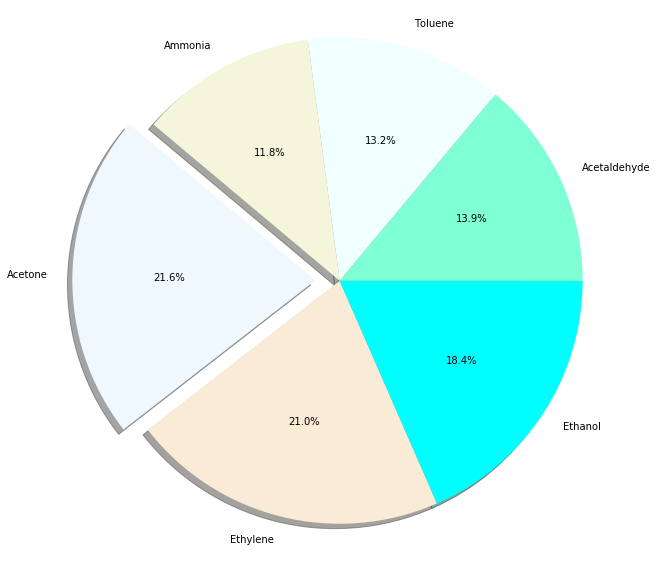

In [103]:
import matplotlib.pyplot as plt
import matplotlib
color = []
for name, hex in matplotlib.colors.cnames.items():
    #print(name, hex)
    color.append(name)

# Data to plot
plt.figure(figsize=[10,10])
label = (batch['Gas_Name'].value_counts().index)
count = (batch['Gas_Name'].value_counts().values)
colors = color[:6]
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(count, explode=explode, labels=label, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.show()

In [104]:
X = batch.iloc[:,:-1]   #Predictor 
y = batch.iloc[:,-1]   #Target Variable

print(X.shape)
print(y.shape)

(13910, 128)
(13910,)


#Label Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
y = le.fit_transform(y)

In [107]:
set(y)

{0, 1, 2, 3, 4, 5}

In [108]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,11977.0371,2.946364,2.490357,3.283046,8.131875,-1.657614,-2.670484,-11.795855,87.6957,1.159134,0.197929,0.762242,2.842983,-0.403618,-1.504792,-4.009174,6545.7951,2.681873,1.586356,2.451056,6.471909,-1.033144,-1.889404,-7.508670,6531.9788,2.648504,1.587340,2.509630,6.394788,-1.037479,-1.852363,-7.829341,1595.5628,1.774699,0.429596,0.954193,3.343654,-0.278677,-0.663230,-4.325258,...,5896.5437,2.550617,1.375705,1.990851,4.159800,-0.906092,-1.426136,-4.821636,2369.9190,1.901459,0.649035,1.195575,3.480005,-0.372511,-0.676491,-3.161533,2408.2803,1.903436,0.643479,1.205665,3.758508,-0.365197,-0.667545,-2.630399,9561.0537,2.874070,2.315423,3.504013,6.410912,-1.578773,-2.423573,-7.170650,8644.8520,2.833984,2.063476,3.004145,5.358905,-1.387367,-2.142489,-6.199217
1,21234.2896,4.223873,4.758852,6.588781,10.873780,-3.145160,-4.474324,-14.394855,33730.9175,7.440933,9.210292,14.600396,23.285923,-6.258699,-21.446604,-90.519781,13481.9639,3.925300,4.284987,7.731080,13.139475,-2.932555,-4.666328,-13.413838,13184.3447,3.817408,4.300387,8.187447,12.834914,-2.899999,-4.760296,-13.925581,3506.7290,2.531017,1.447368,3.916827,7.337202,-0.865773,-1.677422,-6.264296,...,12657.9585,3.892609,3.756303,6.316123,8.649709,-2.619232,-3.741913,-8.672364,4507.8479,2.564952,1.738874,5.011458,7.525723,-1.007162,-1.739166,-3.841780,4417.1604,2.499560,1.612479,3.998643,6.078643,-0.921447,-1.448299,-3.535729,20899.8989,4.534828,7.002927,13.346384,17.683192,-4.784119,-7.378631,-14.347134,18538.2510,4.372579,6.203024,11.380773,14.663342,-4.112915,-6.365457,-12.539143
2,13190.5258,3.139281,2.743704,3.603623,8.335304,-1.807550,-2.781656,-9.959871,32443.2602,5.922316,7.244470,9.763977,16.002759,-4.745009,-7.249021,-24.678040,6711.5147,2.639740,1.629937,2.504255,6.613255,-1.087230,-1.905436,-8.148679,6678.3501,2.597738,1.632618,2.652014,6.183993,-1.084977,-1.975420,-8.021718,1834.4371,1.833224,0.508089,1.088213,4.466086,-0.338793,-0.811356,-4.817046,...,5992.0412,2.514420,1.400917,2.055723,4.371960,-0.931720,-1.450329,-4.328004,2523.6528,1.929713,0.699229,1.245044,3.280606,-0.407293,-0.781874,-3.204540,2578.1294,1.938654,0.694089,1.178812,3.426164,-0.393887,-0.693244,-3.109719,9917.9189,2.862339,2.370671,3.506747,6.642310,-1.672505,-2.658821,-7.089700,8914.2002,2.809080,2.110775,3.110680,5.728957,-1.459713,-2.201871,-6.398889
3,15803.7851,3.500589,3.375378,4.549901,8.983869,-2.278670,-3.915519,-11.937122,29541.8398,3.865898,8.606988,13.787756,20.284235,-10.984647,-43.753639,-103.965622,13272.6967,3.762166,4.236259,7.629373,11.029859,-2.860140,-4.618819,-13.789238,13032.9028,3.663526,4.240365,8.175016,13.549453,-2.840234,-4.547981,-13.924736,3504.0578,2.455864,1.428310,4.028577,6.982376,-0.850576,-1.629418,-5.646212,...,12476.3984,3.751890,3.702452,6.105374,9.214525,-2.521001,-3.697841,-7.568677,4386.3655,2.472970,1.700078,4.860368,7.582863,-0.994203,-1.716005,-4.006492,4312.5913,2.422555,1.566753,3.910159,6.309279,-0.893841,-1.486349,-3.746882,20664.0630,4.347666,6.933951,13.204469,16.716431,-4.675211,-7.464786,-16.511583,18378.3940,4.215725,6.140109,11.200258,14.870893,-4.010406,-6.422811,-12.380150
4,16342.6787,3.497127,3.393961,4.303557,8.713730,-2.173565,-3.373084,-11.741132,38268.0747,6.157833,8.455788,10.947585,18.461315,-5.525025,-16.433549,-59.166087,6520.3470,2.689893,1.552825,2.482971,6.718461,-1.057537,-1.850578,-8.556068,6424.6221,2.614550,1.566129,2.592859,6.983259,-1.044134,-1.866587,-7.887472,2030.8525,1.950215,0.535799,1.051997,3.852270,-0.359286,-0.853735,-4.251998,...,5836.3589,2.564228,1.324584,1.968871,4.110023,-0.910696,-1.426008,-4.087423,2685.1223,2.035320,0.708168,1.365186,3.652104,-0.430872,-0.754068,-2.759974,2705.7552,2.030118,0.703332,1.241783,3.165923,-0.414309,-0.708056,-3.358202

In [109]:
X.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
13905,-124.0596,0.974146,0.000169,0.000100,0.00010,-0.559094,-2.687049,-26.738453,-171.7964,0.973466,0.005399,0.031118,0.000100,-0.825746,-3.166459,-24.097311,-40.9878,0.991936,0.005487,0.049798,0.444280,-0.468505,-2.406216,-21.873469,-35.8403,0.993164,0.002373,0.008030,0.000100,-0.490554,-2.379126,-20.524263,-7.3530,0.996458,0.003074,0.057573,0.583667,-0.228511,-2.217701,-17.580526,...,-48.5205,0.989371,0.004729,0.051670,0.562638,-0.419541,-2.251809,-21.454420,-4.1186,0.998402,0.010320,0.076890,0.573230,-0.336820,-2.823111,-22.162642,-12.4504,0.995495,0.001948,0.054492,0.663295,-0.336392,-2.761795,-21.737967,-68.3423,0.988305,0.006614,0.050681,0.424640,-0.896519,-7.708881,-65.136028,-53.5762,0.989903,0.007713,0.071928,0.420224,-0.760267,-6.156265,-51.260295
13906,-53.6573,0.981065,0.002778,0.018861,0.00010,-0.549071,-2.901755,-29.393637,-78.4229,0.978061,0.006676,0.043487,0.273948,-0.812645,-3.598952,-31.409522,-37.7439,0.990513,0.001738,0.007875,0.103424,-0.439771,-2.295830,-22.260627,-38.0513,0.990841,0.002714,0.003490,0.000100,-0.461830,-2.272524,-21.155972,-14.4655,0.992325,0.006411,0.042756,0.275731,-0.219092,-2.169121,-17.672173,...,-41.6961,0.988087,0.003372,0.033390,0.000100,-0.400406,-2.051758,-18.274442,-19.9102,0.991340,0.008421,0.075121,0.556491,-0.327689,-2.722714,-21.845046,-15.5703,0.993591,0.008313,0.073727,0.673385,-0.319630,-2.579940,-21.559989,-58.3193,0.986932,0.001705,0.022642,0.460129,-0.850930,-7.145691,-61.543118,-55.4870,0.986487,0.003414,0.011488,0.118849,-0.712452,-5.667068,-48.430340
13907,-52.0076,0.980492,0.002451,0.010516,0.02619,-0.532593,-2.723623,-24.990430,-75.5695,0.977270,0.009288,0.058113,0.492391,-0.776437,-3.188634,-30.115730,-23.1172,0.993873,0.003579,0.033881,0.348365,-0.422089,-2.287677,-22.252381,-35.9951,0.990879,0.002053,0.002601,0.128581,-0.444271,-2.268471,-18.224758,-2.2750,0.998753,0.005383,0.044604,0.273250,-0.213732,-2.113883,-17.606857,...,-17.5500,0.994689,0.005449,0.043436,0.306860,-0.385888,-1.994985,-17.746881,-7.2803,0.996712,0.007792,0.059133,0.633610,-0.317988,-2.726026,-21.147734,-9.4209,0.995985,0.006257,0.061090,0.380956,-0.314538,-2.567372,-21.665086,-33.3560,0.992042,0.003807,0.035725,0.383364,-0.811419,-6.872763,-57.806688,-24.9985,0.993538,0.006953,0.051403,0.460391,-0.684826,-5.485327,-46.395341
13908,-57.6011,0.978761,0.000100,0.000100,0.00010,-0.566765,-2.911777,-27.040842,-90.5369,0.973521,0.002252,0.020647,0.000100,-0.813196,-3.331936,-32.507939,-14.1521,0.996232,0.010058,0.072215,0.577041,-0.408183,-2.135430,-20.804399,-14.1857,0.996385,0.003902,0.004063,0.000100,-0.423746,-2.048839,-18.199882,5.4561,1.003005,0.009187,0.059332,0.522619,-0.212069,-2.096042,-16.229468,...,-6.6079,0.997991,0.003773,0.043643,0.601150,-0.371743,-1.950742,-19.264388,6.7854,1.003086,0.014589,0.091757,0.835089,-0.312334,-2.665172,-20.491404,10.6201,1.004591,0.011992,0.096010,0.713828,-0.309449,-2.518787,-21.245091,-7.1948,0.998278,0.009906,0.071109,0.725449,-0.789855,-6.587319,-54.899206,-9.6699,0.997488,0.006896,0.068452,0.674890,-0.663170,-5.291654,-43.661628
13909,-50.1287,0.981138,0.003742,0.025935,0.23474,-0.532485,-2.835910,-28.871633,-79.9851,0.976021,0.003561,0.029047,0.000100,-0.780028,-3.295759,-28.305483,-32.6119,0.991338,0.003042,0.026605,0.314074,-0.404622,-2.011237,-19.496804,-31.5217,0.991984,0.004215,0.012674,0.063270,-0.421007,-1.972510,-17.720967,-9.5557,0.994772,0.005763,0.050069,0.227690,-0.208335,-2.072745,-16.811216,...,-27.0451,0.991827,0.003351,0.035252,0.447910,-0.369723,-1.859326,-17.888129,-19.4309,0.991270,0.005965,0.058550,0.389200,-0.302549,-2.562484,-21.353202,-4.4565,0.998092,0.008706,0.071118,0.514859,-0.296540,-2.509910,-20.598170,-38.0205,0.990968,0.000219,0.000100,0.000100,-0.776411,

#Normalization of predictors

In [0]:
import numpy as np
from sklearn.preprocessing import normalize

In [0]:
X1 = np.array(X)

In [112]:
print(X1.shape)
X1

(13910, 128)


array([[ 1.19770371e+04,  2.94636400e+00,  2.49035700e+00, ...,
        -1.38736700e+00, -2.14248900e+00, -6.19921700e+00],
       [ 2.12342896e+04,  4.22387300e+00,  4.75885200e+00, ...,
        -4.11291500e+00, -6.36545700e+00, -1.25391430e+01],
       [ 1.31905258e+04,  3.13928100e+00,  2.74370400e+00, ...,
        -1.45971300e+00, -2.20187100e+00, -6.39888900e+00],
       ...,
       [-5.20076000e+01,  9.80492000e-01,  2.45100000e-03, ...,
        -6.84826000e-01, -5.48532700e+00, -4.63953410e+01],
       [-5.76011000e+01,  9.78761000e-01,  1.00000000e-04, ...,
        -6.63170000e-01, -5.29165400e+00, -4.36616280e+01],
       [-5.01287000e+01,  9.81138000e-01,  3.74200000e-03, ...,
        -6.55771000e-01, -5.12225900e+00, -4.46366210e+01]])

In [113]:
X2 = normalize(X1[:,:], axis=1)
print(X2.shape)
X2

(13910, 128)


array([[ 3.88229590e-01,  9.55048964e-05,  8.07236605e-05, ...,
        -4.49707985e-05, -6.94476955e-05, -2.00944478e-04],
       [ 2.94943314e-01,  5.86694033e-05,  6.61002372e-05, ...,
        -5.71282017e-05, -8.84159073e-05, -1.74168124e-04],
       [ 2.83799626e-01,  6.75429310e-05,  5.90319280e-05, ...,
        -3.14063298e-05, -4.73741665e-05, -1.37674747e-04],
       ...,
       [-2.62037076e-01,  4.94014829e-03,  1.23492119e-05, ...,
        -3.45045344e-03, -2.76374808e-02, -2.33760056e-01],
       [-3.01631363e-01,  5.12533640e-03,  5.23655560e-07, ...,
        -3.47272658e-03, -2.77100404e-02, -2.28636543e-01],
       [-2.39789894e-01,  4.69325909e-03,  1.78998016e-05, ...,
        -3.13687087e-03, -2.45022501e-02, -2.13518616e-01]])

In [114]:
X3 = pd.DataFrame(X2)
print(X3.shape)
X3.head()

(13910, 128)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.388230,0.000096,0.000081,0.000106,0.000264,-0.000054,-0.000087,-0.000382,0.002843,0.000038,0.000006,0.000025,0.000092,-0.000013,-0.000049,-0.000130,0.212179,0.000087,0.000051,0.000079,0.000210,-0.000033,-0.000061,-0.000243,0.211731,0.000086,0.000051,0.000081,0.000207,-0.000034,-0.000060,-0.000254,0.051719,0.000058,0.000014,0.000031,0.000108,-0.000009,-0.000021,-0.000140,...,0.191133,0.000083,0.000045,0.000065,0.000135,-0.000029,-0.000046,-0.000156,0.076820,0.000062,0.000021,0.000039,0.000113,-0.000012,-0.000022,-0.000102,0.078063,0.000062,0.000021,0.000039,0.000122,-0.000012,-0.000022,-0.000085,0.309917,0.000093,0.000075,0.000114,0.000208,-0.000051,-0.000079,-0.000232,0.280218,0.000092,0.000067,0.000097,0.000174,-0.000045,-0.000069,-0.000201
1,0.294943,0.000059,0.000066,0.000092,0.000151,-0.000044,-0.000062,-0.000200,0.468521,0.000103,0.000128,0.000203,0.000323,-0.000087,-0.000298,-0.001257,0.187264,0.000055,0.000060,0.000107,0.000183,-0.000041,-0.000065,-0.000186,0.183130,0.000053,0.000060,0.000114,0.000178,-0.000040,-0.000066,-0.000193,0.048708,0.000035,0.000020,0.000054,0.000102,-0.000012,-0.000023,-0.000087,...,0.175818,0.000054,0.000052,0.000088,0.000120,-0.000036,-0.000052,-0.000120,0.062614,0.000036,0.000024,0.000070,0.000105,-0.000014,-0.000024,-0.000053,0.061354,0.000035,0.000022,0.000056,0.000084,-0.000013,-0.000020,-0.000049,0.290299,0.000063,0.000097,0.000185,0.000246,-0.000066,-0.000102,-0.000199,0.257495,0.000061,0.000086,0.000158,0.000204,-0.000057,-0.000088,-0.000174
2,0.283800,0.000068,0.000059,0.000078,0.000179,-0.000039,-0.000060,-0.000214,0.698030,0.000127,0.000156,0.000210,0.000344,-0.000102,-0.000156,-0.000531,0.144401,0.000057,0.000035,0.000054,0.000142,-0.000023,-0.000041,-0.000175,0.143687,0.000056,0.000035,0.000057,0.000133,-0.000023,-0.000043,-0.000173,0.039469,0.000039,0.000011,0.000023,0.000096,-0.000007,-0.000017,-0.000104,...,0.128921,0.000054,0.000030,0.000044,0.000094,-0.000020,-0.000031,-0.000093,0.054297,0.000042,0.000015,0.000027,0.000071,-0.000009,-0.000017,-0.000069,0.055470,0.000042,0.000015,0.000025,0.000074,-0.000008,-0.000015,-0.000067,0.213388,0.000062,0.000051,0.000075,0.000143,-0.000036,-0.000057,-0.000153,0.191793,0.000060,0.000045,0.000067,0.000123,-0.000031,-0.000047,-0.000138
3,0.231238,0.000051,0.000049,0.000067,0.000131,-0.000033,-0.000057,-0.000175,0.432251,0.000057,0.000126,0.000202,0.000297,-0.000161,-0.000640,-0.001521,0.194204,0.000055,0.000062,0.000112,0.000161,-0.000042,-0.000068,-0.000202,0.190695,0.000054,0.000062,0.000120,0.000198,-0.000042,-0.000067,-0.000204,0.051271,0.000036,0.000021,0.000059,0.000102,-0.000012,-0.000024,-0.000083,...,0.182553,0.000055,0.000054,0.000089,0.000135,-0.000037,-0.000054,-0.000111,0.064181,0.000036,0.000025,0.000071,0.000111,-0.000015,-0.000025,-0.000059,0.063101,0.000035,0.000023,0.000057,0.000092,-0.000013,-0.000022,-0.000055,0.302353,0.000064,0.000101,0.000193,0.000245,-0.000068,-0.000109,-0.000242,0.268910,0.000062,0.000090,0.000164,0.000218,-0.000059,-0.000094,-0.000181
4,0.303759,0.000065,0.000063,0.000080,0.000162,-0.000040,-0.000063,-0.000218,0.711284,0.000114,0.000157,0.000203,0.000343,-0.000103,-0.000305,-0.001100,0.121193,0.000050,0.000029,0.000046,0.000125,-0.000020,-0.000034,-0.000159,0.119414,0.000049,0.000029,0.000048,0.000130,-0.000019,-0.000035,-0.000147,0.037747,0.000036,0.000010,0.000020,0.000072,-0.000007,-0.000016,-0.000079,...,0.108480,0.000048,0.000025,0.000037,0.000076,-0.000017,-0.000027,-0.000076,0.049908,0.000038,0.000013,0.000025,0.000068,-0.000008,-0.000014,-0.000051,0.050292,0.000038,0.000013,0.000023,0.000059,-0.000008,-0.000013,-0.000062,0.183975,0.000055,0.000042,0.000065,0.000113,-0.000031,-0.000045,-0.000121,0.165484,0.000054,0.000038,0.000

#Now we have two types of data 
 1. Normalize -----> X2, X3      
 2. Without Normalization -----> X  ,X1
 
 
 And the target data  ------> y

# 1. Split the data into train and test using X2 dataset

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [116]:
y.shape

(13910,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9319, 128)
(9319,)
(4591, 128)
(4591,)


#Apply Machine learning Algorithms (classification )

In [125]:
#XGBOOST Algorithm
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [127]:
# Predicting the Test set results
y_pred = xgb_model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(y_test, y_pred)*100 ,'%' )
    

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

Train Accuracy ::  98.47527771727293 %


,0,1,2,3,4,5
0,616,2,0,4,0,0
1,6,989,1,2,3,3
2,0,5,528,0,3,0
3,4,2,0,859,8,1
4,3,4,1,0,947,0
5,16,1,1,0,0,582


In [121]:
#RandomFroest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
# Predicting the Test set results
y_pred = rf_model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(y_test, y_pred)*100 ,'%' )
    

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

Train Accuracy ::  99.36832934001308 %


,0,1,2,3,4,5
0,622,0,0,0,0,0
1,1,998,2,0,1,2
2,0,2,532,0,2,0
3,1,0,1,865,6,1
4,1,3,2,0,949,0
5,4,0,0,0,0,596


In [130]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,622,0,0,0,0,0
1,1,998,2,0,1,2
2,0,2,532,0,2,0
3,1,0,1,865,6,1
4,1,3,2,0,949,0
5,4,0,0,0,0,596


In [131]:
#APPLY logistic Regression
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
# Predicting the Test set results
y_pred = lg_model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(y_test, y_pred)*100 ,'%' )
    

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

Train Accuracy ::  87.38836854715748 %


,0,1,2,3,4,5
0,254,45,0,312,8,3
1,1,990,3,6,1,3
2,1,5,517,0,13,0
3,55,12,0,773,5,29
4,3,19,0,0,932,1
5,1,43,0,4,6,546


### We have applied on Normalize dataset xgboost (98.47%)  , RandomForest(99.36%) , LogisticRgression (87.38%)

# 2. Split the data into train and test using X1 dataset

In [133]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1 , y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9319, 128)
(9319,)
(4591, 128)
(4591,)


#Apply Machine learning Algorithms (classification )

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#XGBOOST Algorithm
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
xgb_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgb_model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(y_test, y_pred)*100 ,'%' )
    

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

Train Accuracy ::  98.34458723589631 %


,0,1,2,3,4,5
0,607,8,0,5,0,2
1,5,987,3,2,3,4
2,1,5,527,0,3,0
3,5,0,0,856,13,0
4,0,7,0,2,946,0
5,6,2,0,0,0,592


In [135]:
#RandomFroest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(y_test, y_pred)*100 ,'%' )
    

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy ::  99.17229361794816 %


,0,1,2,3,4,5
0,616,4,0,2,0,0
1,2,997,3,0,1,1
2,1,3,531,0,1,0
3,0,2,0,869,3,0
4,2,5,0,2,945,1
5,5,0,0,0,0,595


In [136]:
#APPLY logistic Regression
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = lg_model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(y_test, y_pred)*100 ,'%' )
    

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train Accuracy ::  97.7564800697016 %


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,0,1,2,3,4,5
0,581,10,0,24,4,3
1,10,984,4,4,1,1
2,0,5,515,11,5,0
3,2,0,0,867,5,0
4,0,4,0,1,950,0
5,7,0,0,2,0,591


### We have applied on Non-Normalize dataset -->xgboost (98.34%)  , RandomForest(99.17%) , LogisticRgression (97.75%)

#END



---

---



---



---





---



---



---

